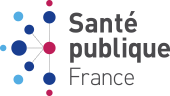

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

In [2]:
df = pd.read_csv('openfoodfacts.csv', sep=',') 

In [3]:
df.head(3)

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  saturated-fat_100g  \
0       3.0          8.5    66.666667                 8.5                 2.0   
1       0.0          9.7    43.666667                10.0                 0.0   
2       0.8         56.0    33.666667                76.0                 0.1   

   fiber_100g  proteins_100g  salt_100g            pnns_groups_1  \
0         0.0           13.0   2.000000  Milk and dairy products   
1         0.0            0.5   0.030000                Beverages   
2         4.8            0.8   0.050038            Sugary snacks   

                                        product_name nutrition_grade_fr  
0    Bridelight 3% Les carrés fondants goût Emmental                  C  
1                                100 % Pur Jus Pomme                  C  
2                                  18 marrons glacés                  C

In [4]:
df.describe()

fat_100g   sugars_100g   energy_100g  carbohydrates_100g  \
count  42067.000000  42067.000000  42067.000000        42067.000000   
mean      12.292464     13.659623     55.826282           28.160480   
std       14.593432     18.707528     22.915078           25.978008   
min        0.000000      0.000000      0.000000            0.000000   
25%        1.600000      1.100000     37.666667            5.200000   
50%        7.100000      4.500000     58.666667           17.000000   
75%       19.333333     19.100000     77.166667           52.000000   
max      100.000000    100.000000    100.000000          100.000000   

       saturated-fat_100g    fiber_100g  proteins_100g     salt_100g  
count        42067.000000  42067.000000   42067.000000  42067.000000  
mean             5.556175      1.821119       7.831977      1.017285  
std              8.514256      3.997692       7.775835      3.000679  
min              0.000000      0.000000       0.000000      0.000000  
25%              0.350000      0.000000       2.000000      0.080000  
50%              2.090000      0.010000       6.100000      0.550000  
75%              7.700000      2.300000      11.000000      1.200000  
max            100.000000    100.000000     100.000000    100.000000

In [5]:
df.columns

Index(['fat_100g', 'sugars_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'pnns_groups_1', 'product_name', 'nutrition_grade_fr'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42067 entries, 0 to 42066
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fat_100g            42067 non-null  float64
 1   sugars_100g         42067 non-null  float64
 2   energy_100g         42067 non-null  float64
 3   carbohydrates_100g  42067 non-null  float64
 4   saturated-fat_100g  42067 non-null  float64
 5   fiber_100g          42067 non-null  float64
 6   proteins_100g       42067 non-null  float64
 7   salt_100g           42067 non-null  float64
 8   pnns_groups_1       42067 non-null  object 
 9   product_name        42067 non-null  object 
 10  nutrition_grade_fr  42067 non-null  object 
dtypes: float64(8), object(3)
memory usage: 3.5+ MB


# Analyse Univariée


In [7]:
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as st

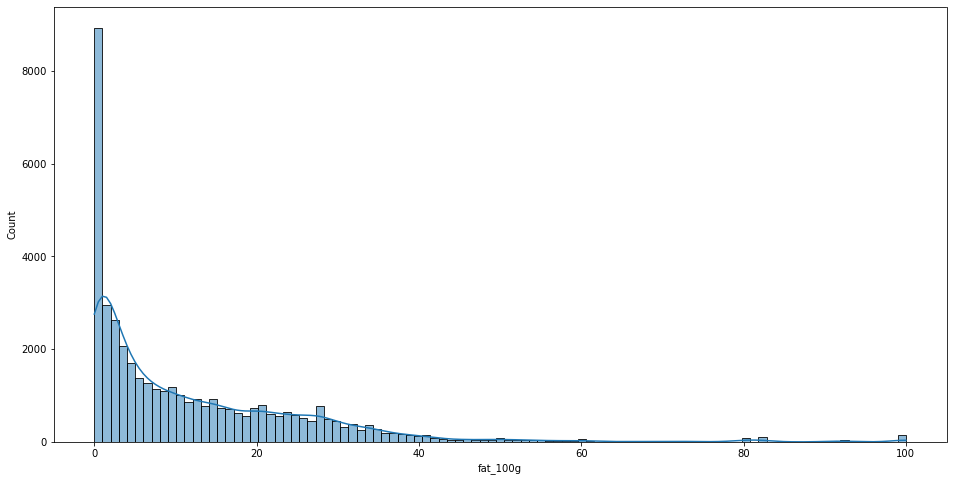

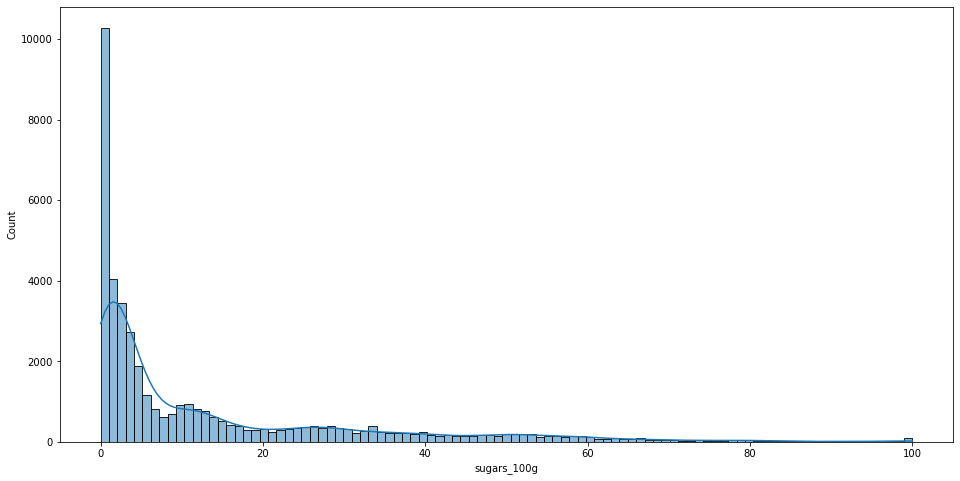

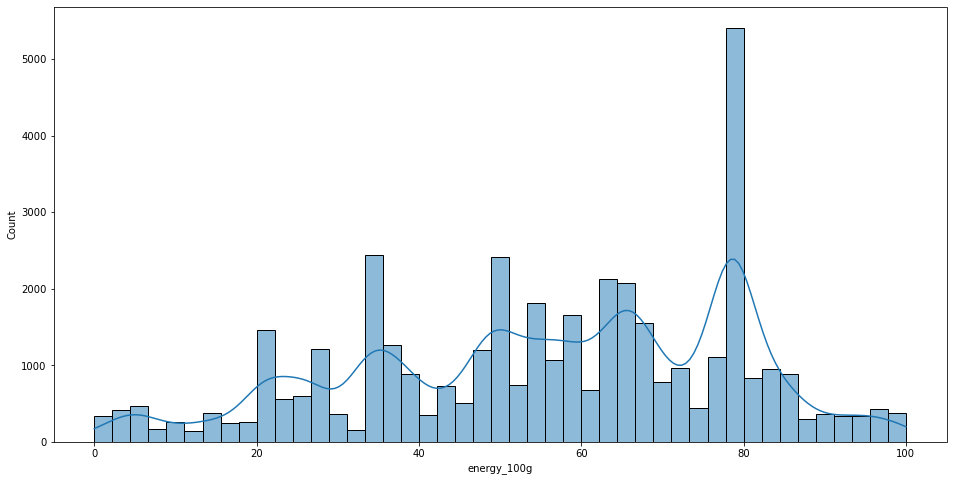

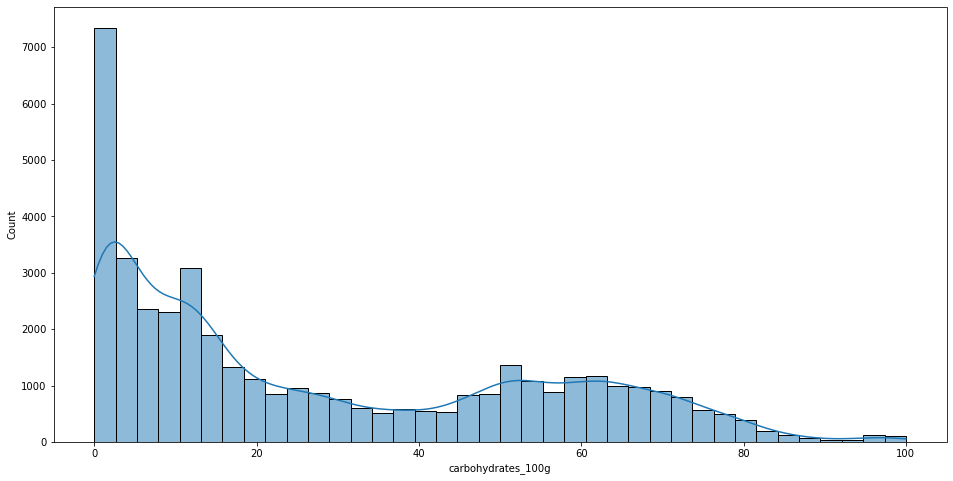

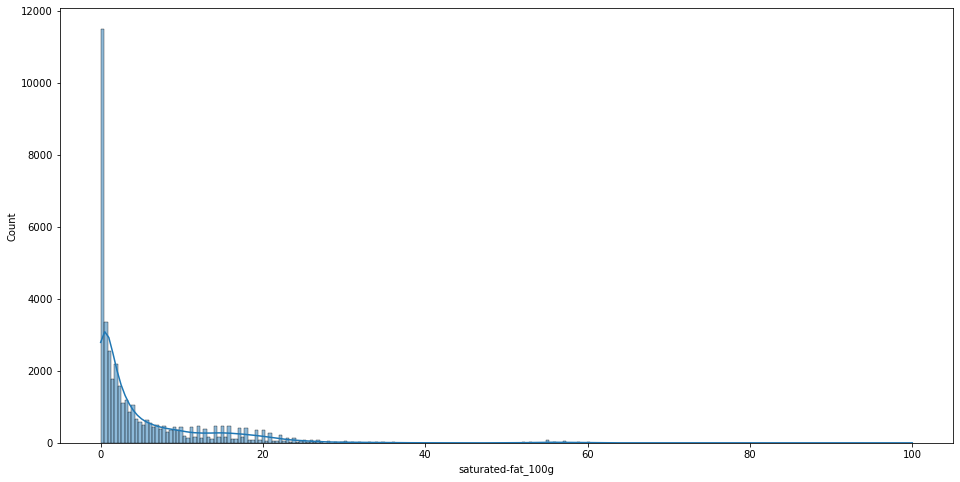

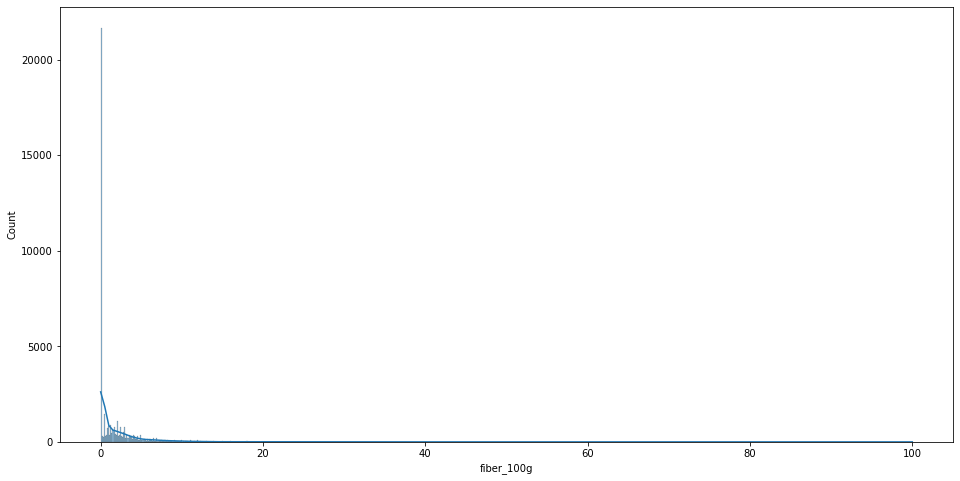

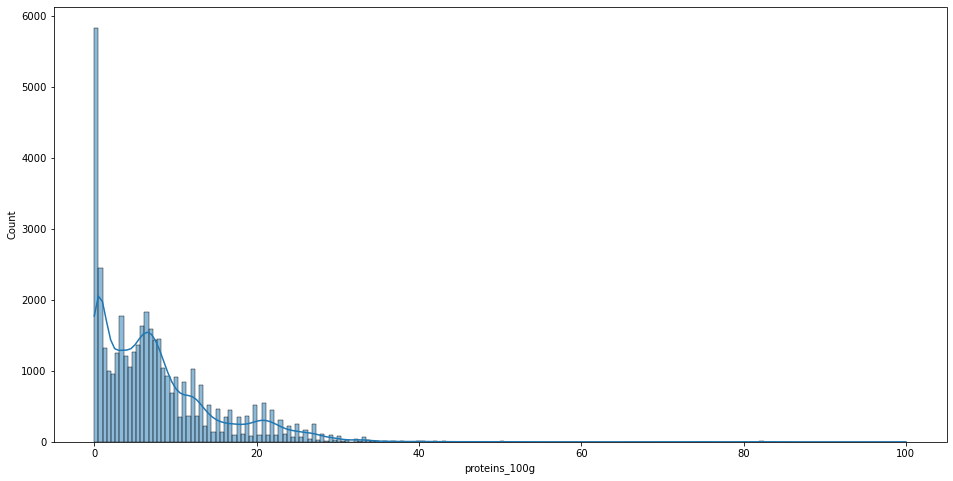

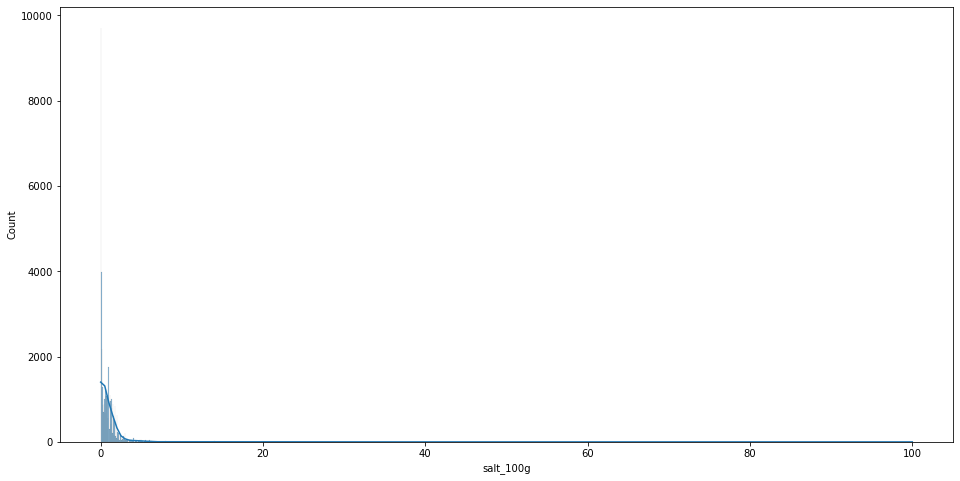

In [8]:
#distplot
for col in df.select_dtypes('float'):
    fig = plt.figure(figsize=(16, 8))
    sns.histplot(x=col, data=df[[col]], kde=True)
    plt.show()

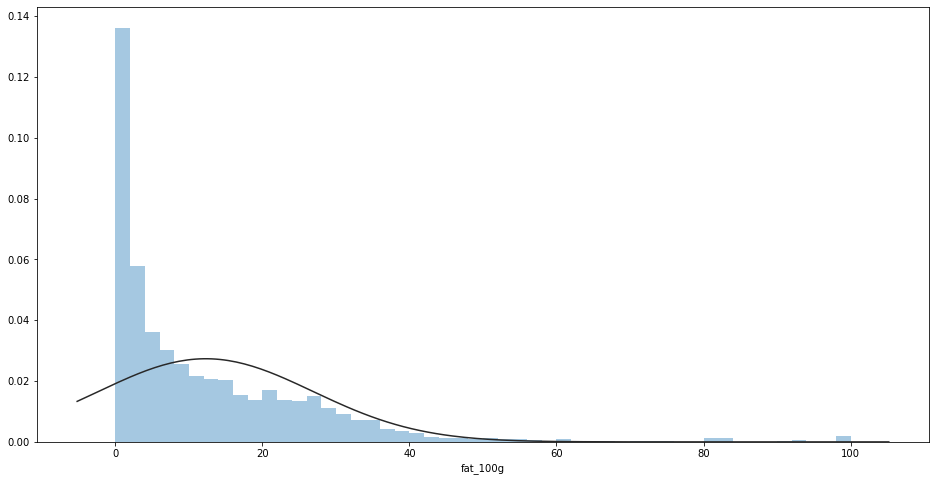

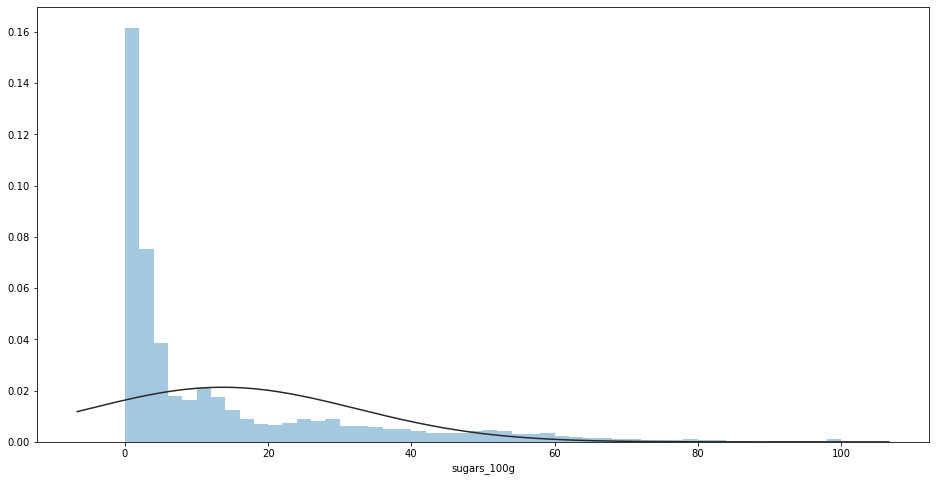

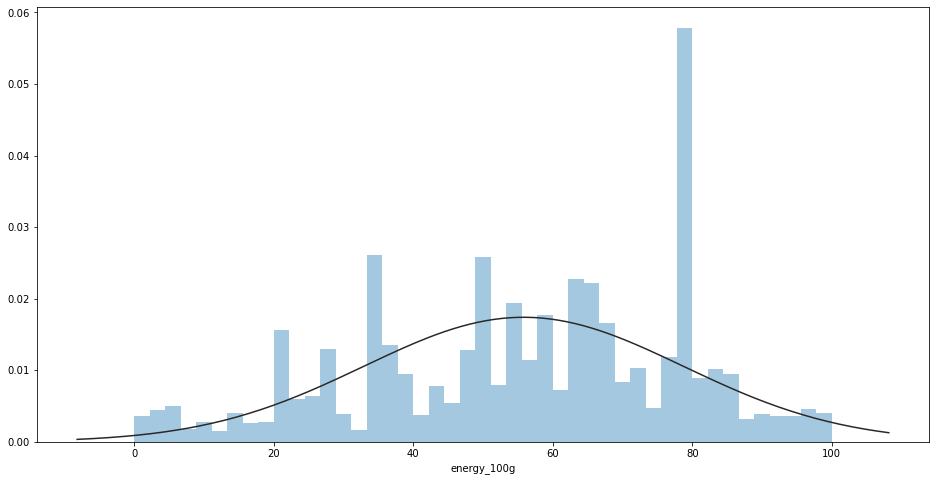

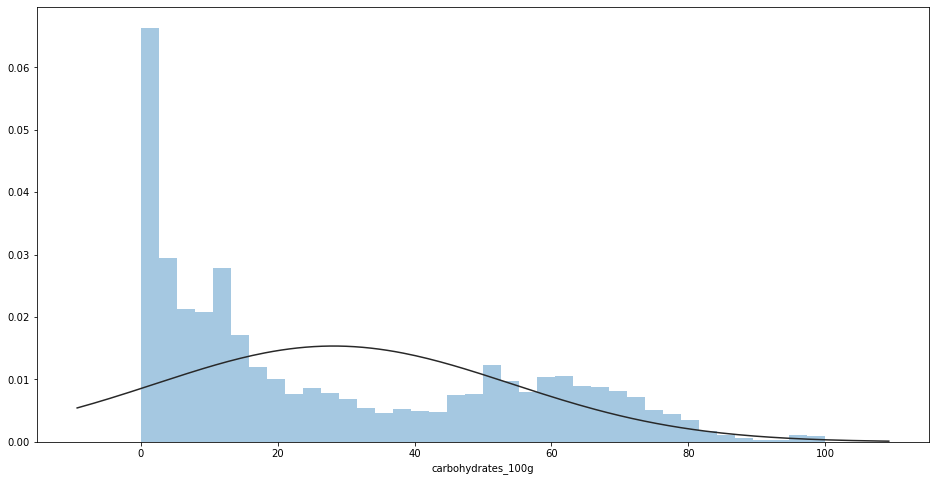

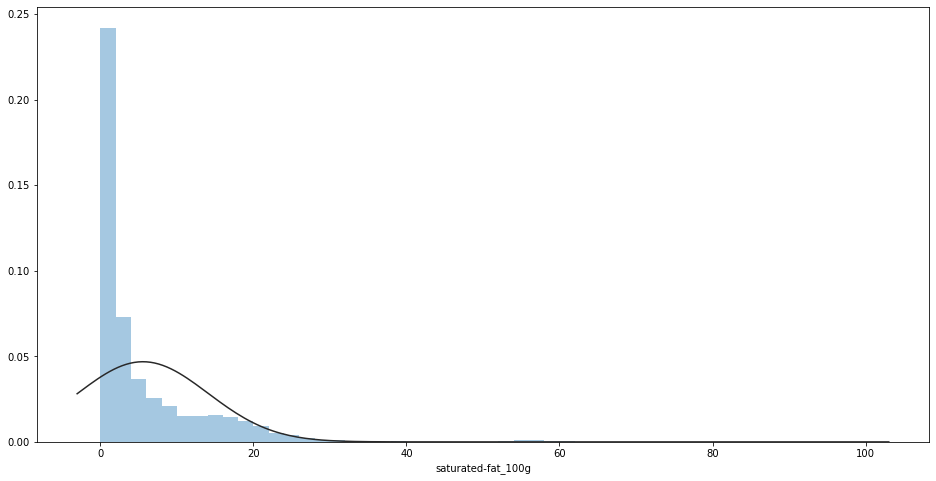

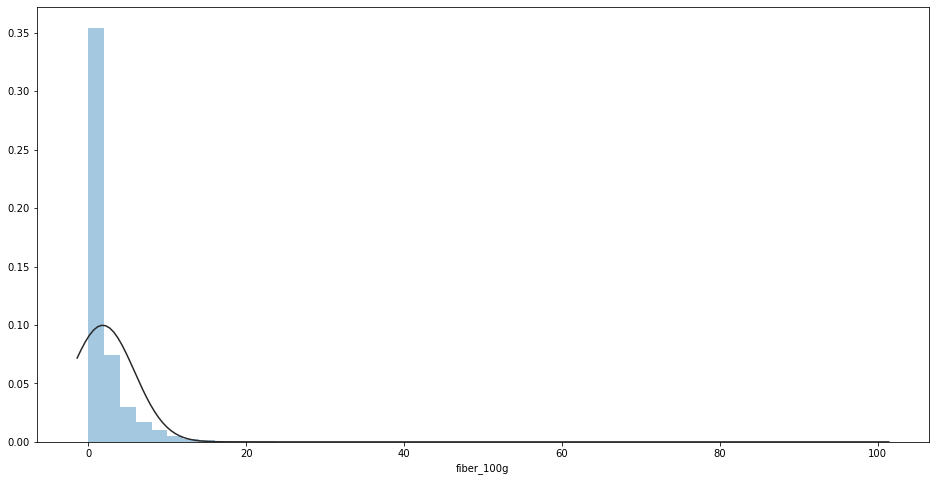

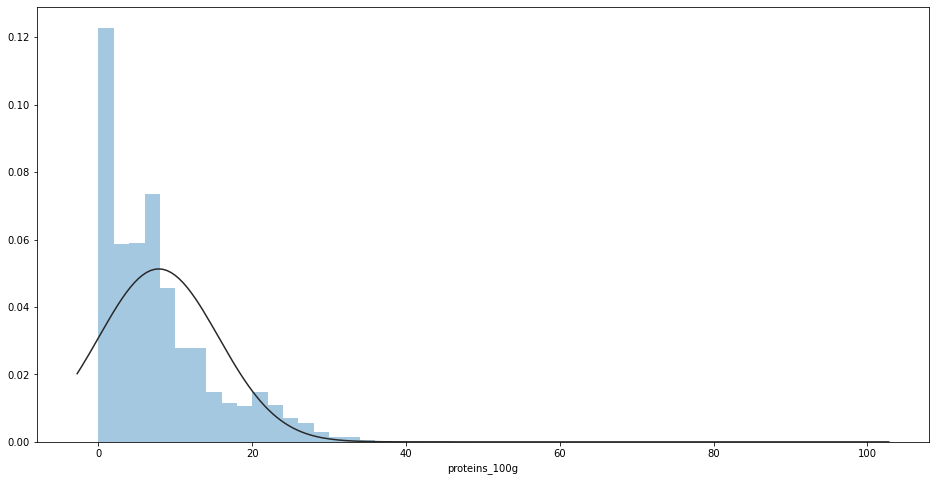

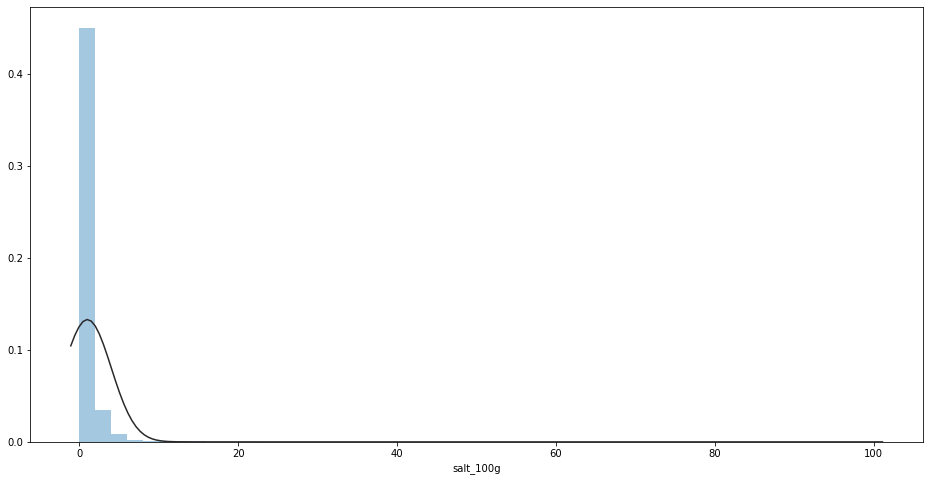

In [9]:
#distplot
for col in df.select_dtypes('float'):
    fig = plt.figure(figsize=(16, 8))
    sns.distplot(df[col], fit=norm, kde=False)
    plt.show()

In [10]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('number'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

fat_100g-------------------------------------------------------------- 0.7752220034599304 0.0
On rejette H0 : la distribution ne suit pas une loi normale
sugars_100g----------------------------------------------------------- 0.7357105016708374 0.0
On rejette H0 : la distribution ne suit pas une loi normale
energy_100g----------------------------------------------------------- 0.9685454368591309 0.0
On rejette H0 : la distribution ne suit pas une loi normale
carbohydrates_100g---------------------------------------------------- 0.8789504170417786 0.0
On rejette H0 : la distribution ne suit pas une loi normale
saturated-fat_100g---------------------------------------------------- 0.650854229927063 0.0
On rejette H0 : la distribution ne suit pas une loi normale
fiber_100g------------------------------------------------------------ 0.4574323296546936 0.0
On rejette H0 : la distribution ne suit pas une loi normale
proteins_100g--------------------------------------------------------- 0.8236

fat_100g


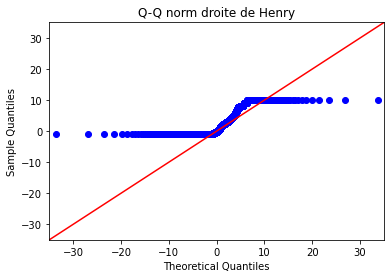

sugars_100g


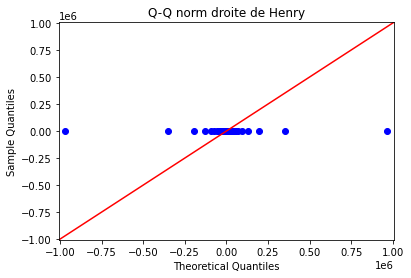

energy_100g


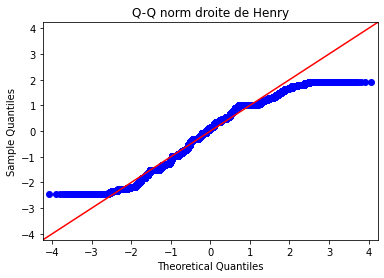

carbohydrates_100g


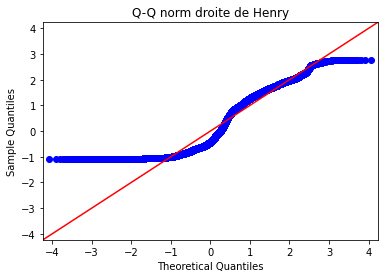

saturated-fat_100g


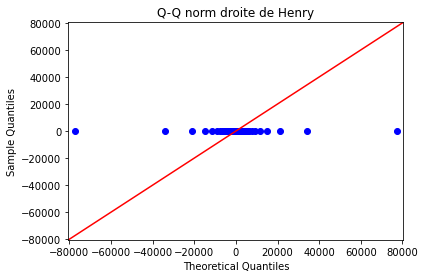

fiber_100g


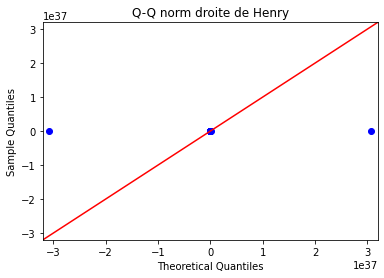

proteins_100g


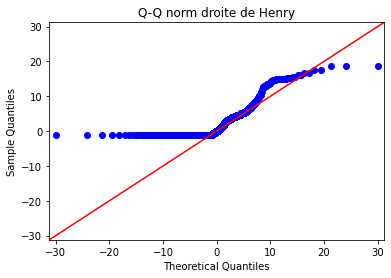

salt_100g


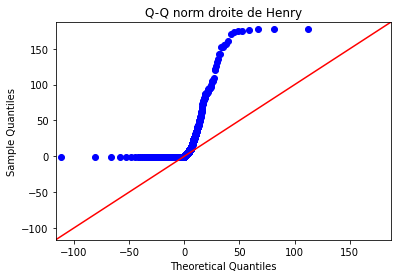

In [11]:
#qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('number'):
    sm.qqplot(df[col],stats.t, fit=True, line="45")
    plt.title("Q-Q norm droite de Henry")
    print(col)
    plt.show()

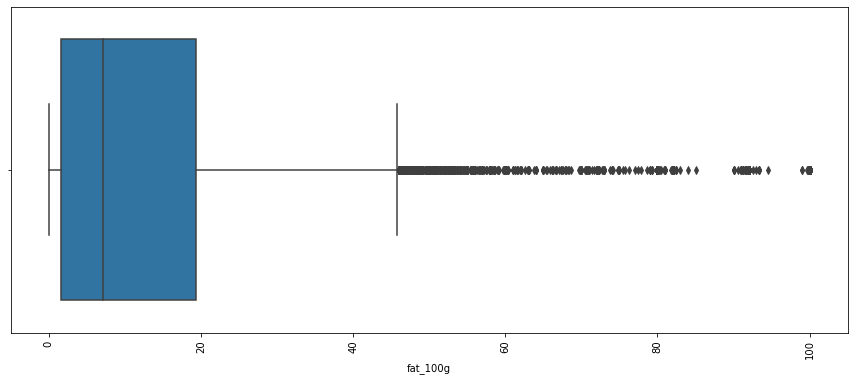

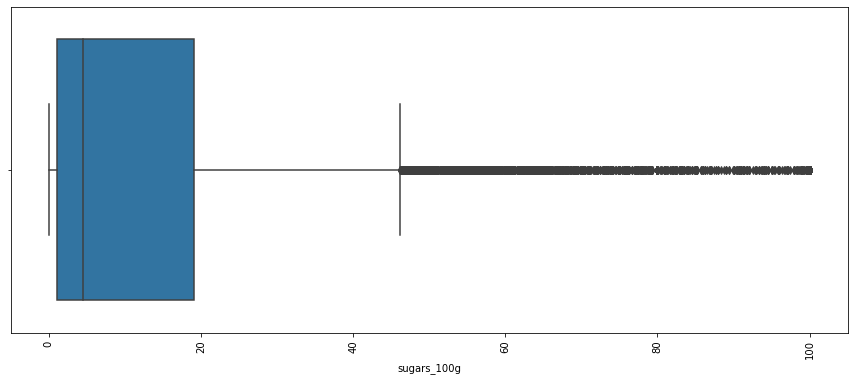

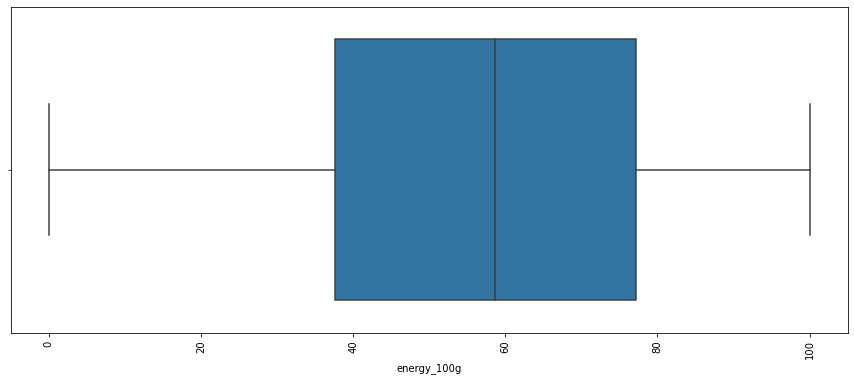

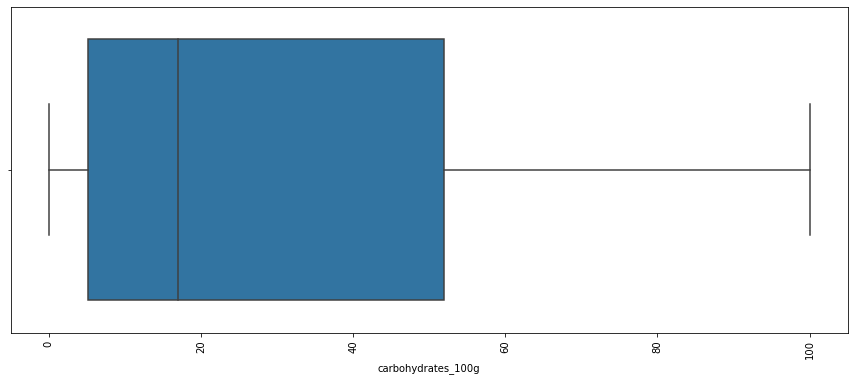

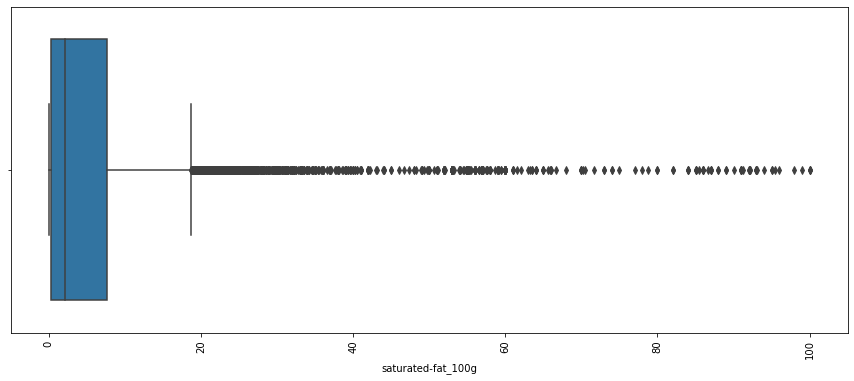

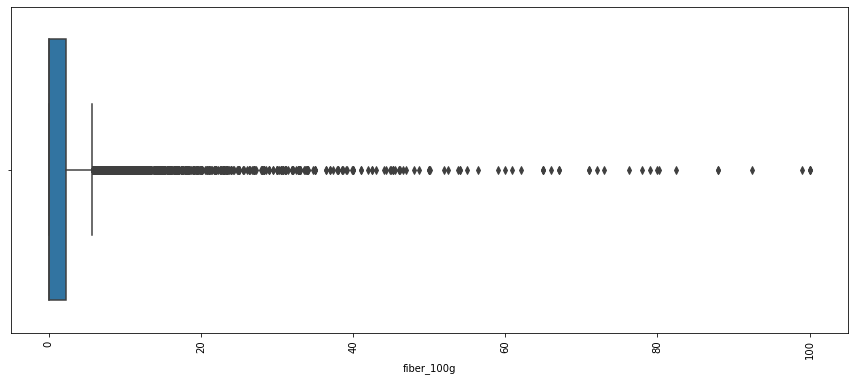

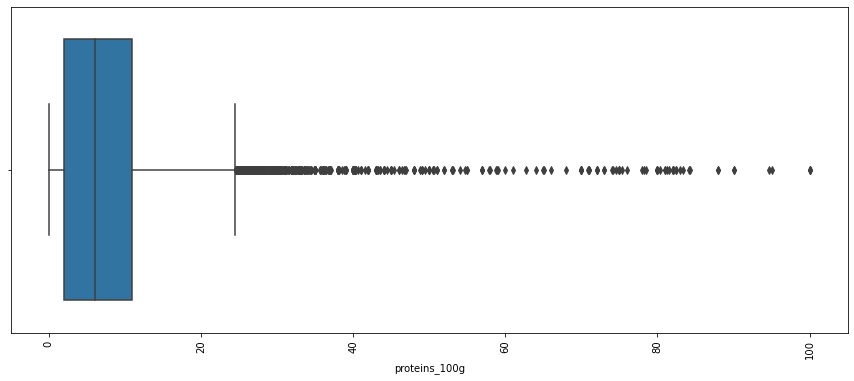

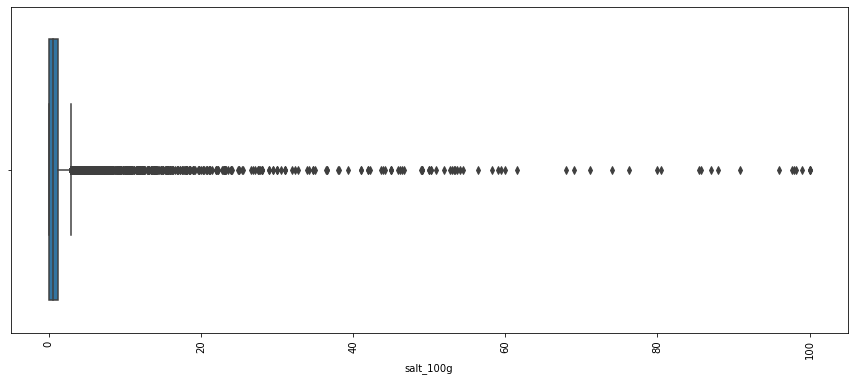

In [12]:
for col in df.select_dtypes('float'):
    plt.figure(figsize=(15,6))
    sns.boxplot(df[col])
    plt.xticks(rotation=90)
    plt.show()

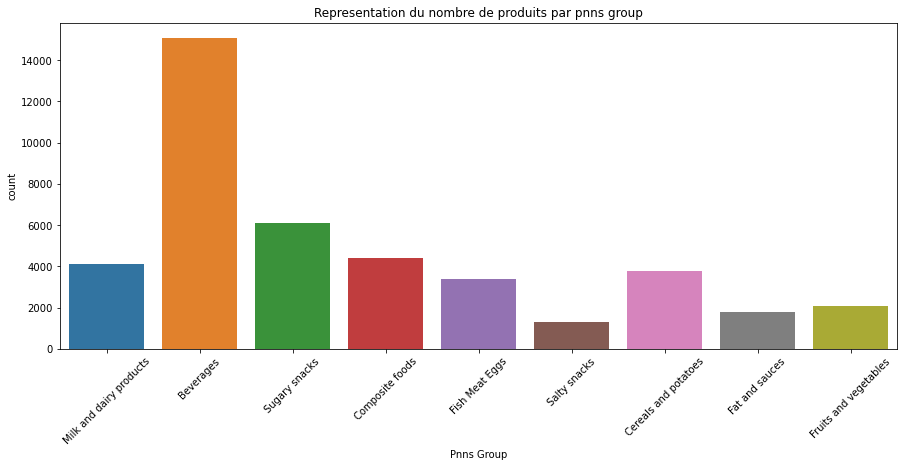

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x="pnns_groups_1",data=df)
plt.title('Representation du nombre de produits par pnns group')
plt.xlabel('Pnns Group')
plt.xticks(rotation=45)
plt.show()

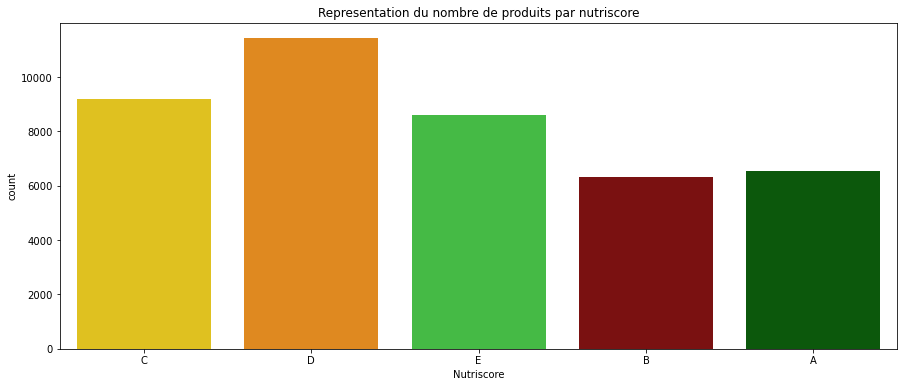

In [14]:
# Representation du nombre de produits par nutriscore
colors = ['gold', 'darkorange','limegreen', 'darkred','darkgreen']
plt.figure(figsize=(15,6))
sns.countplot(x="nutrition_grade_fr",data=df, palette=colors)
plt.title('Representation du nombre de produits par nutriscore')
plt.xlabel('Nutriscore')
plt.show()

# Analyse Bivariée

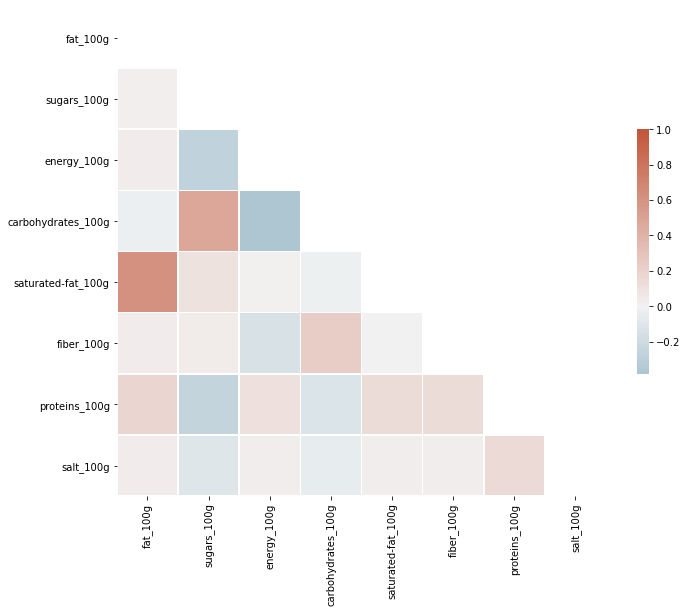

In [15]:
# Compute the correlation matrix
corr = df[['fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

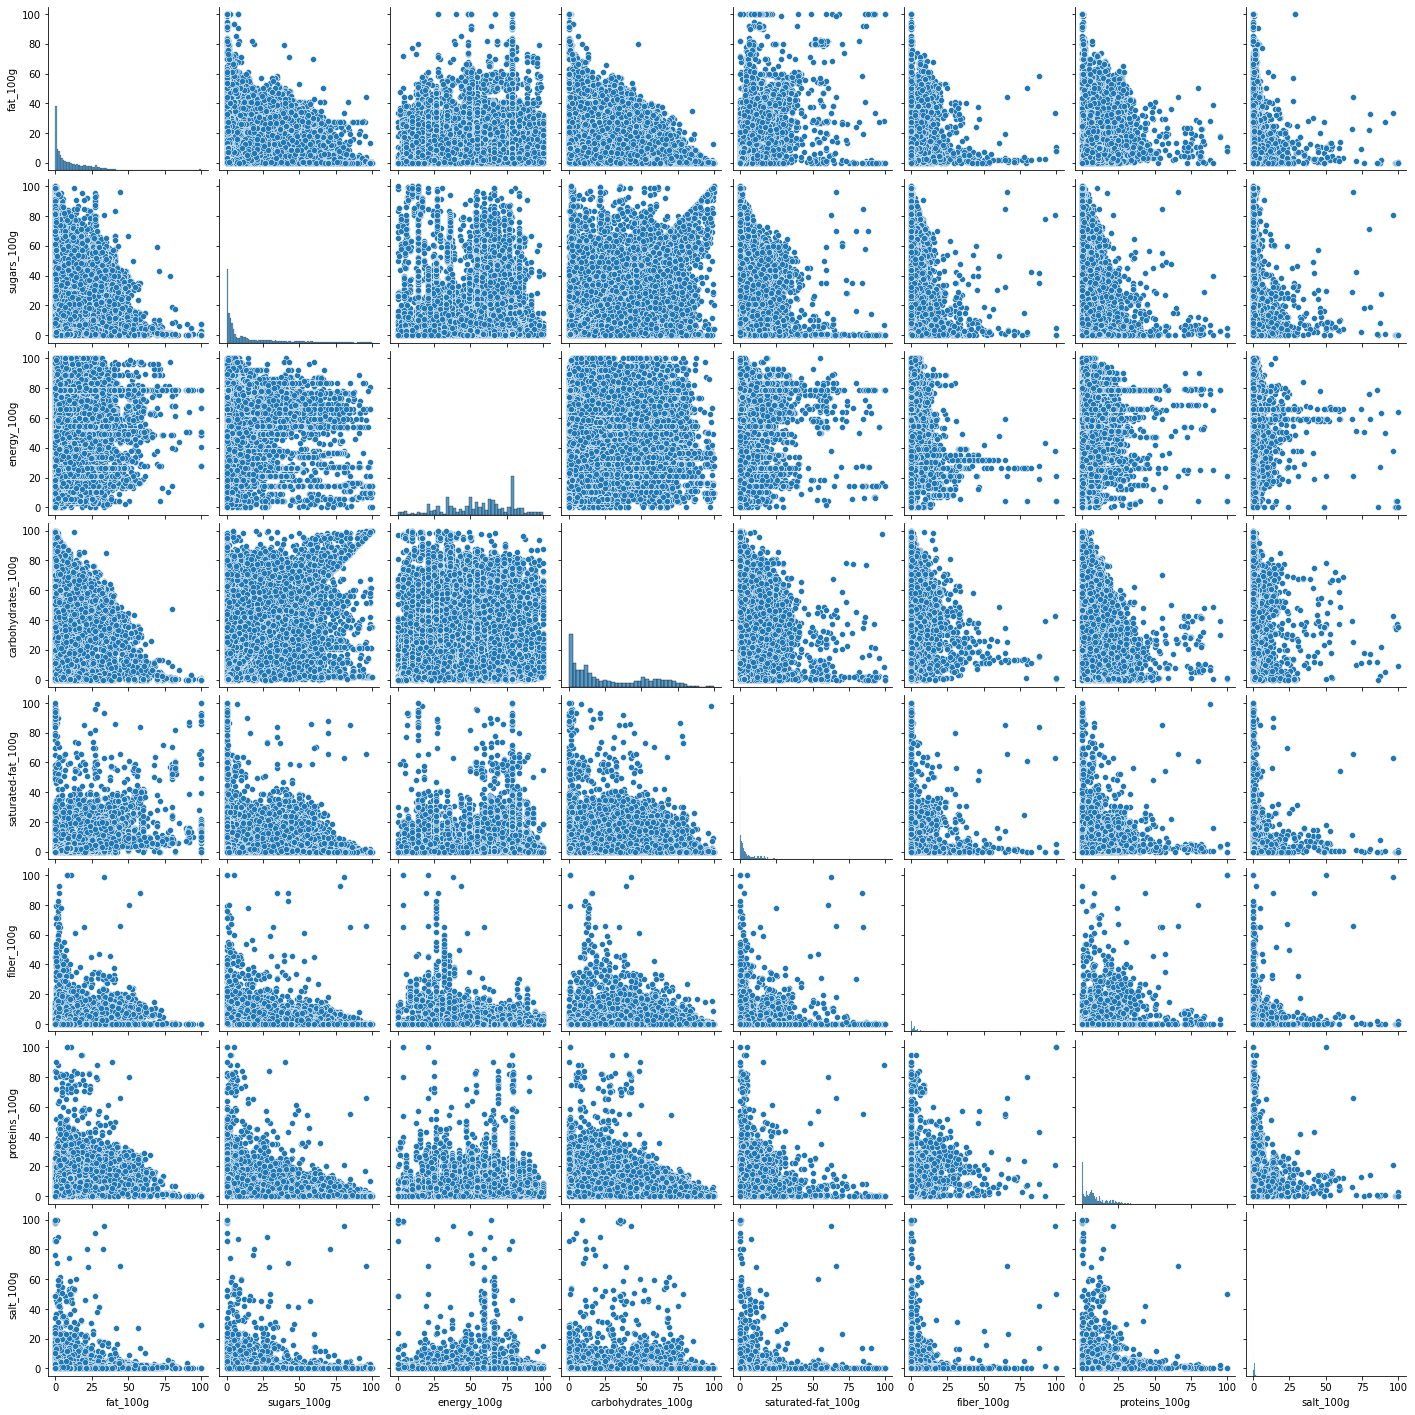

In [16]:
sns.pairplot(df)

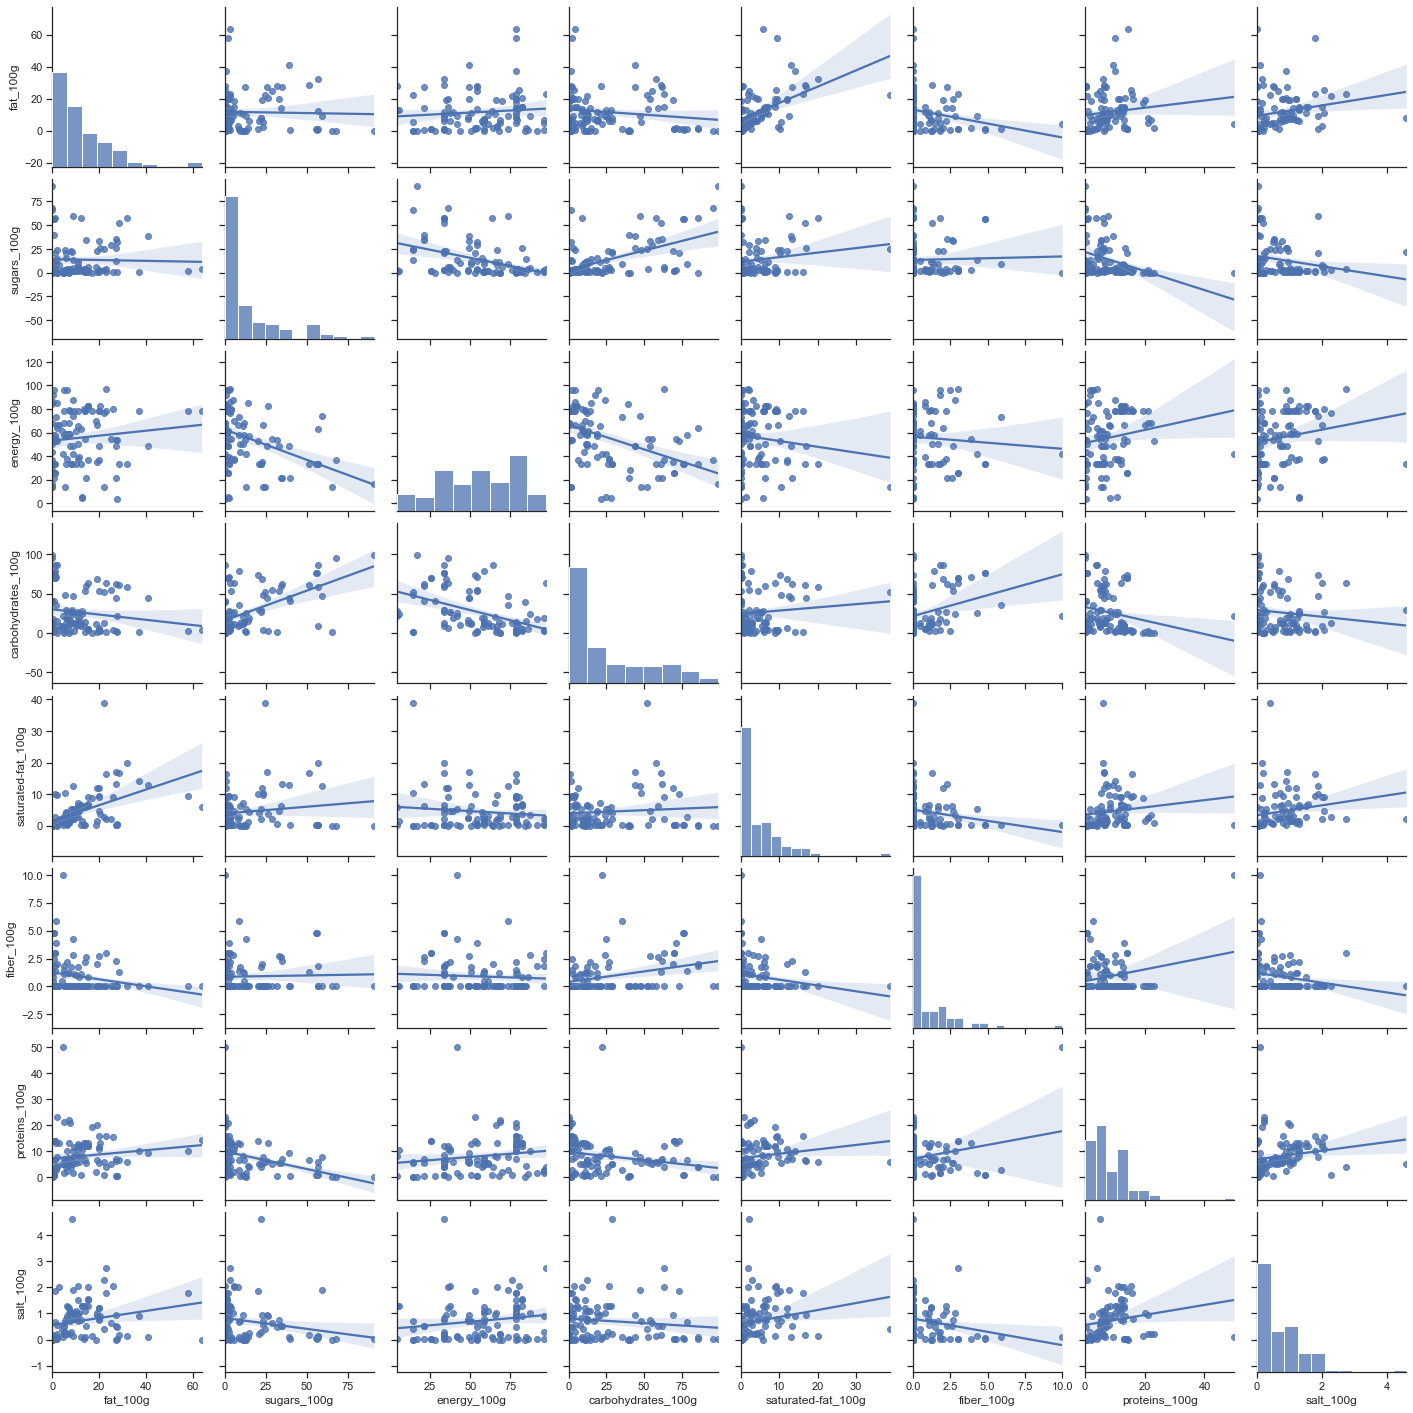

In [17]:
# Make a paiwise scatter plot.
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[:100], kind="reg") # To save time, consider 100 rows only.
plt.show()

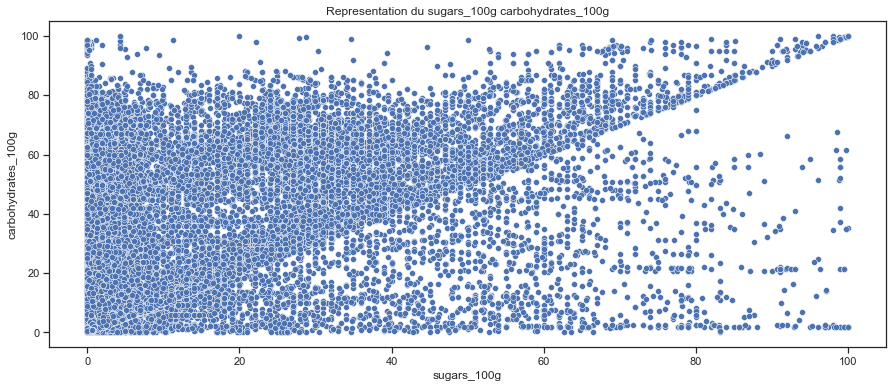

In [18]:
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=df, 
    x='sugars_100g', 
    y='carbohydrates_100g')

plt.title('Representation du sugars_100g carbohydrates_100g')
plt.xlabel('sugars_100g')
plt.ylabel('carbohydrates_100g')
plt.show()

In [19]:
# les moyennes des nutrition_grade par features
df_gb = df.groupby(["nutrition_grade_fr"]).mean()
df_gb

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
nutrition_grade_fr                                                            
A                    3.561391     4.027750    60.510917           28.933572   
B                    5.060900     4.851238    56.693289           20.261205   
C                    8.884439    10.358717    57.884232           24.153000   
D                   16.818852    17.741191    54.767073           29.563043   
E                   21.882290    25.573189    50.834368           35.819996   

                    saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  
nutrition_grade_fr                                                            
A                             0.633918    3.761144       8.057882   0.338442  
B                             1.081649    1.251215       5.767874   0.517881  
C                             2.280230    1.802853       6.828450   0.955244  
D                             7.127579    1.512055       9.081274   1.381426  
E                            14.010223    1.198118       8.594060   1.483068

## Fat_100g
### Nuriscore

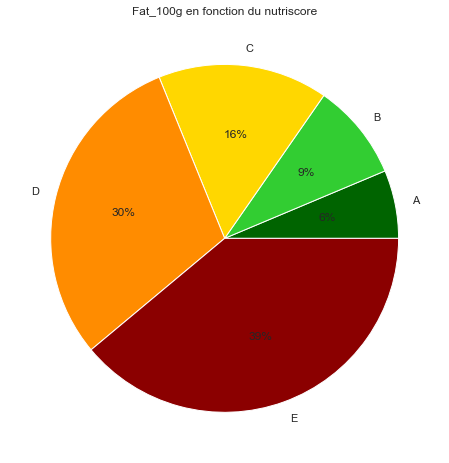

In [20]:
# declaring data
data = df_gb['fat_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Fat_100g en fonction du nutriscore')  
# displaying chart
plt.show()

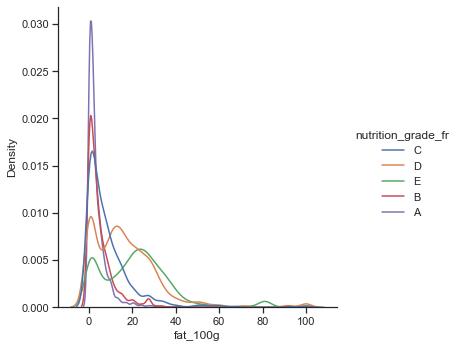

In [21]:
sns.displot(data=df, x="fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

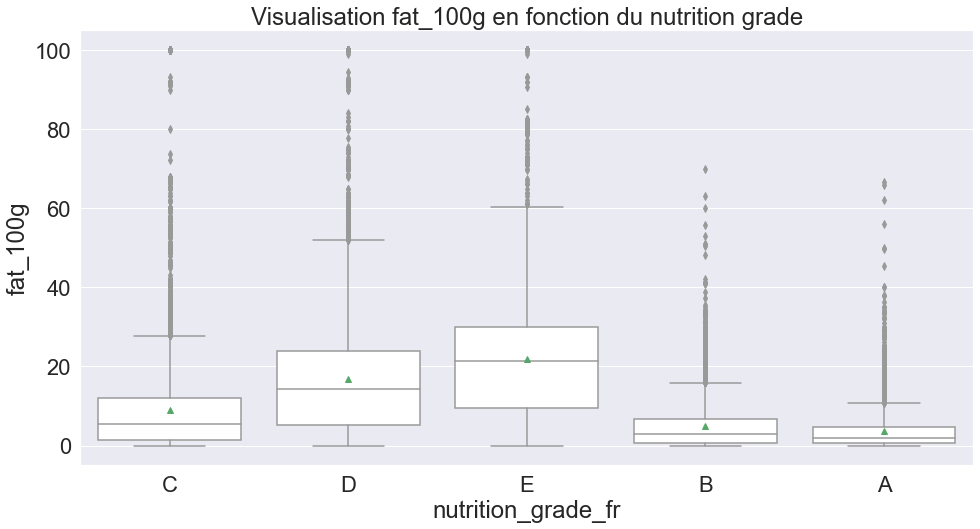

In [22]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fat_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

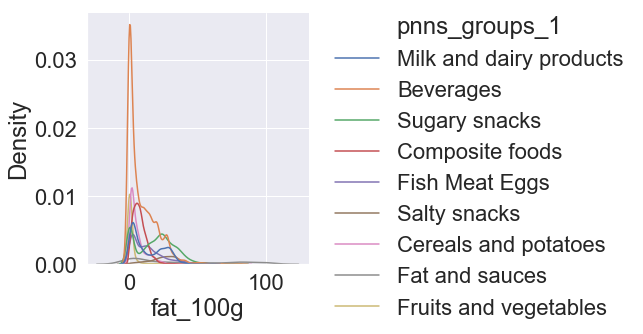

In [23]:
sns.displot(data=df, x="fat_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

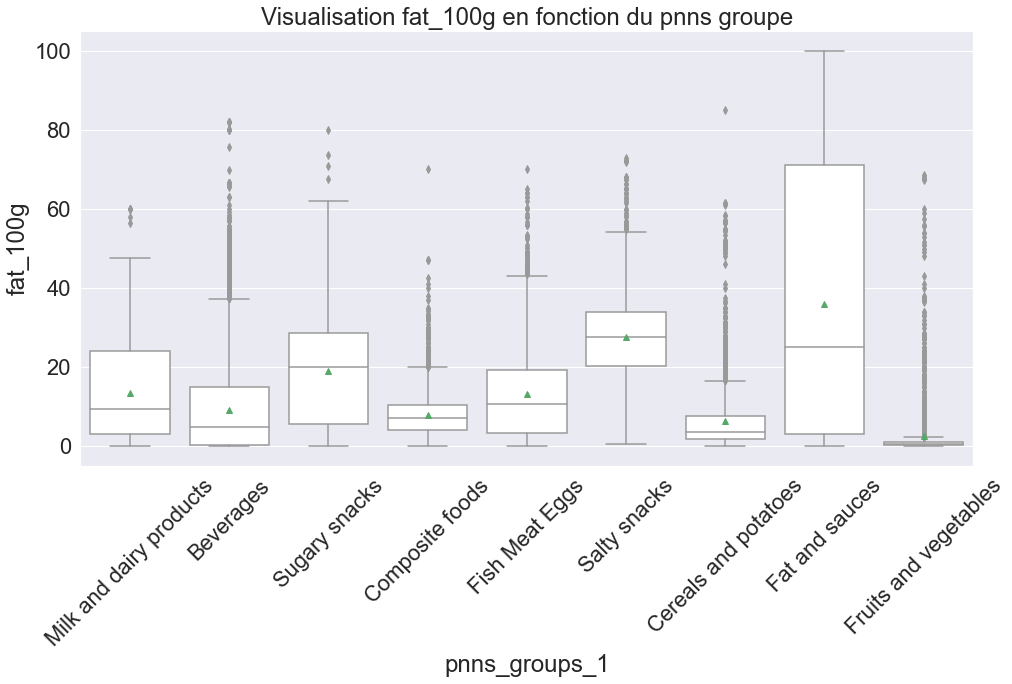

In [24]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fat_100g en fonction du pnns groupe")
plt.xticks(rotation=45)
plt.show()

## Sugars_100g
### Nutriscore

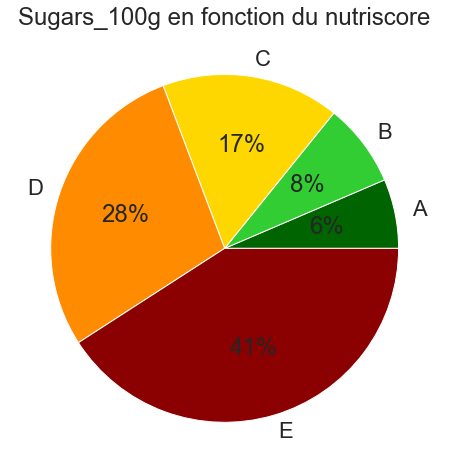

In [25]:
# declaring data
data = df_gb['sugars_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Sugars_100g en fonction du nutriscore')  
# displaying chart
plt.show()

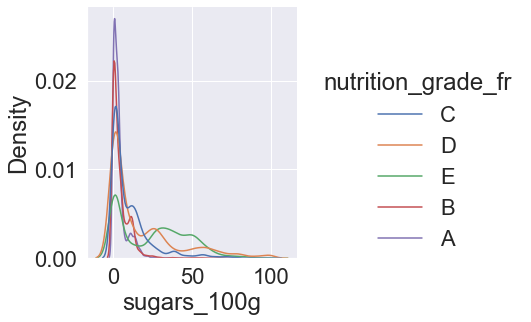

In [26]:
sns.displot(data=df, x="sugars_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

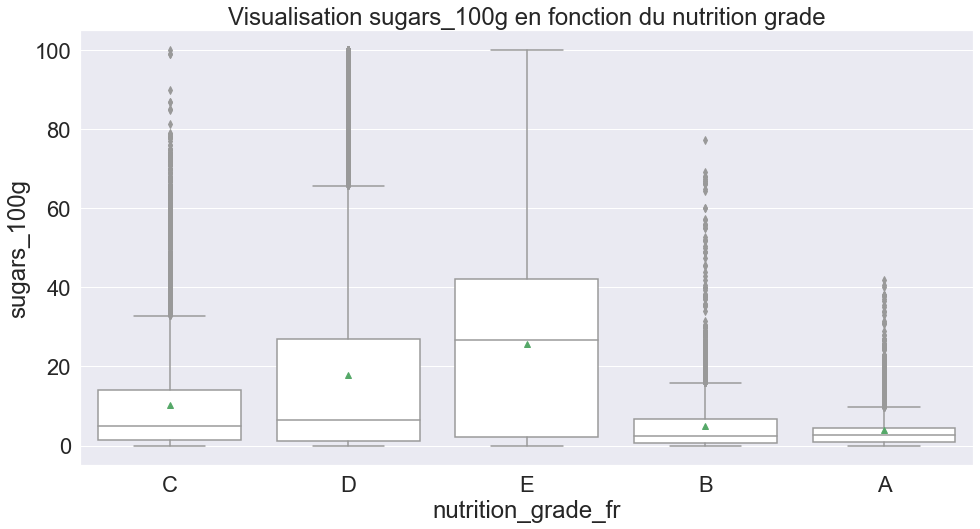

In [27]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation sugars_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

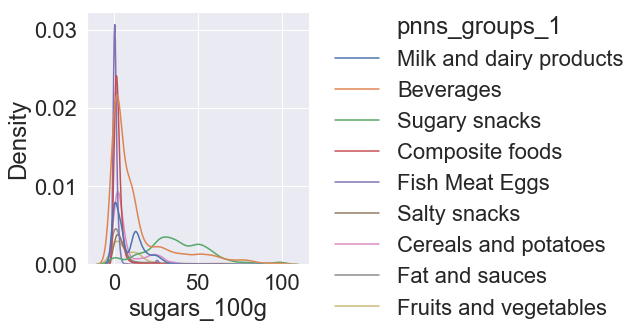

In [28]:
sns.displot(data=df, x="sugars_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

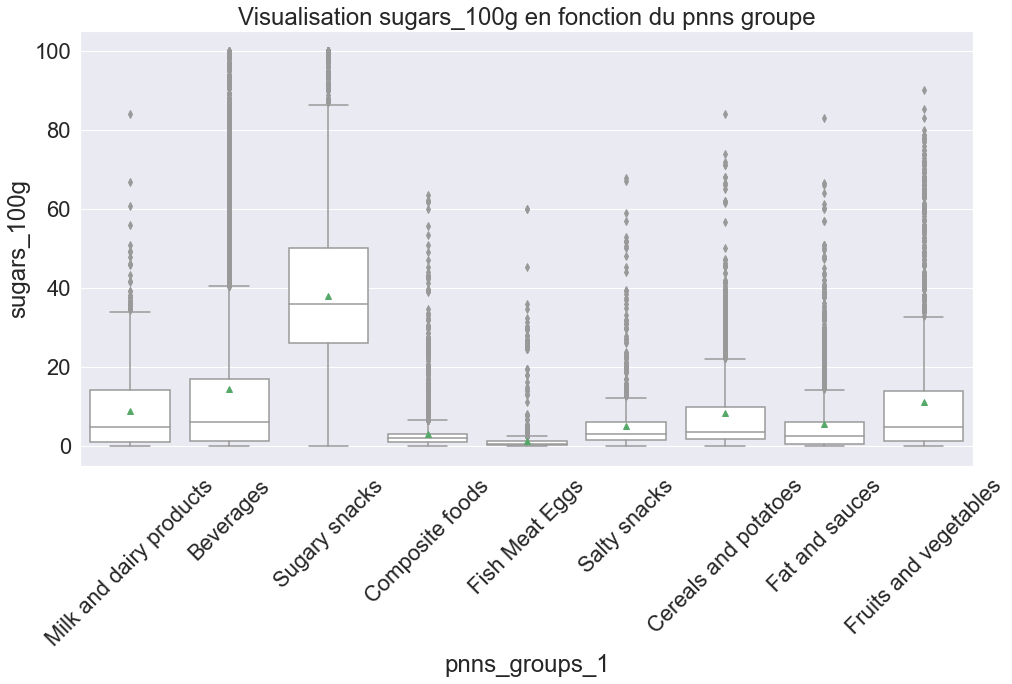

In [29]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation sugars_100g en fonction du pnns groupe")
plt.xticks(rotation=45)
plt.show()

## Energy_100g
### Nutriscore

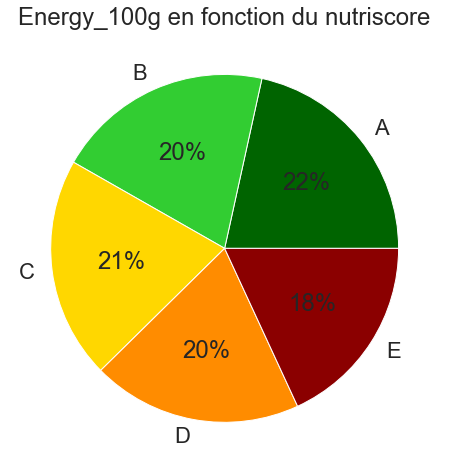

In [30]:
# declaring data
data = df_gb['energy_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Energy_100g en fonction du nutriscore')  
# displaying chart
plt.show()

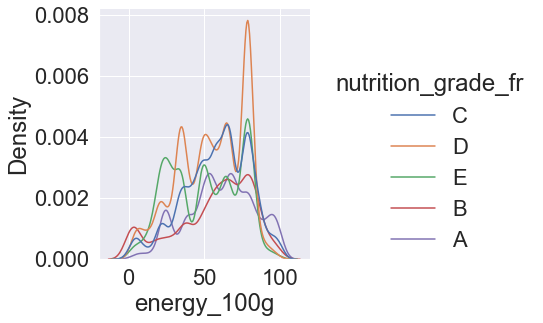

In [31]:
sns.displot(data=df, x="energy_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

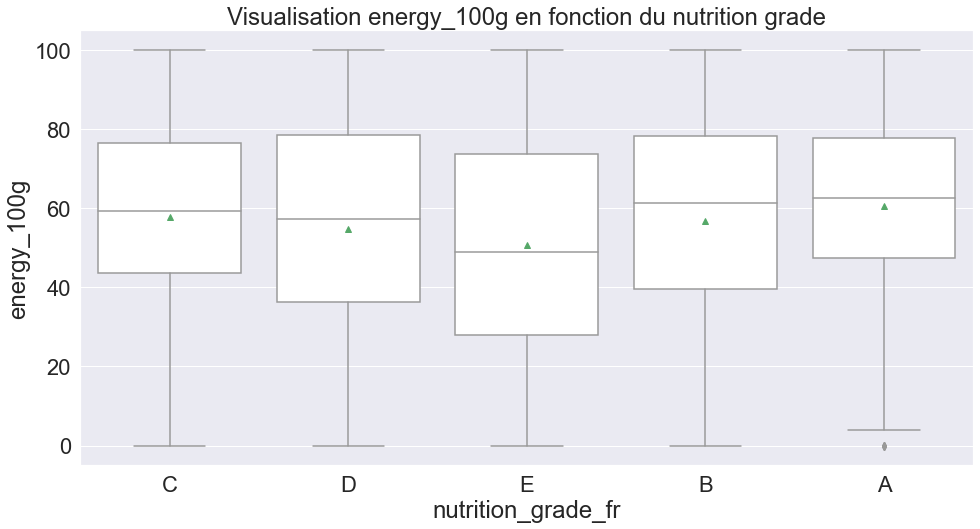

In [32]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation energy_100g en fonction du nutrition grade")
plt.show()

### Pnns Groupe

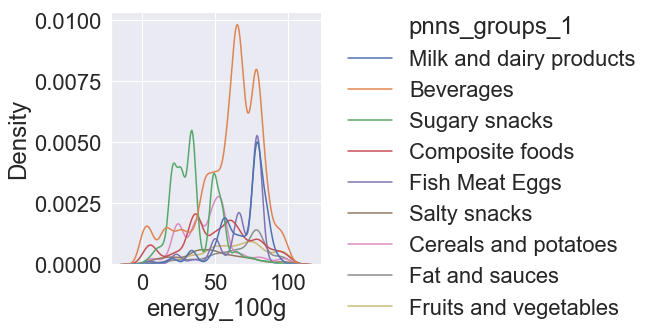

In [33]:
sns.displot(data=df, x="energy_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

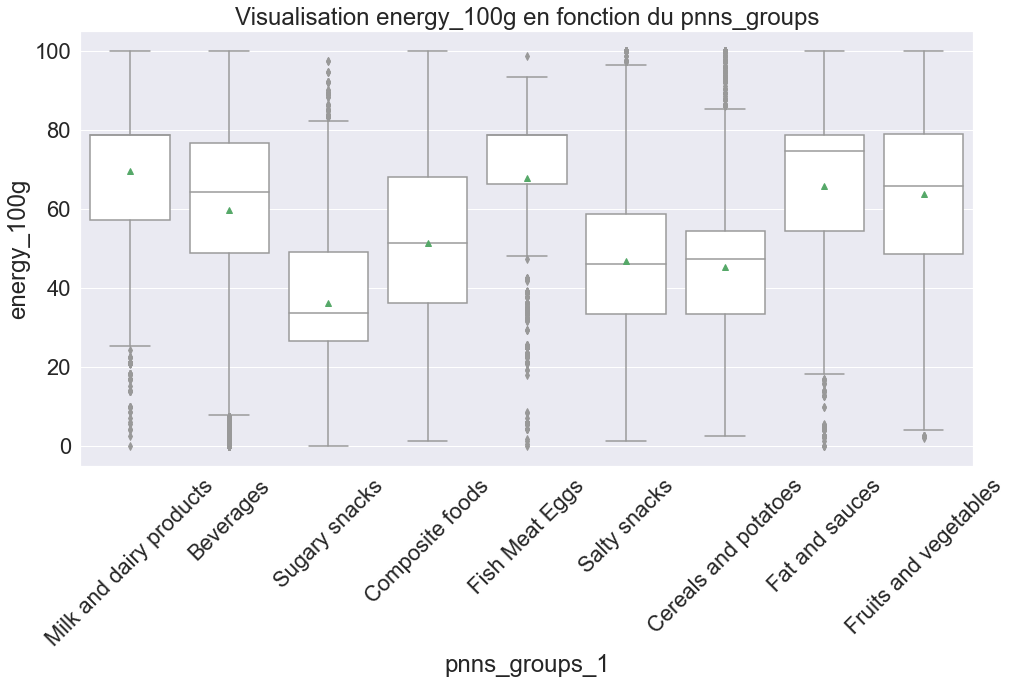

In [34]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation energy_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Carbohydrates_100g
### Nutriscore

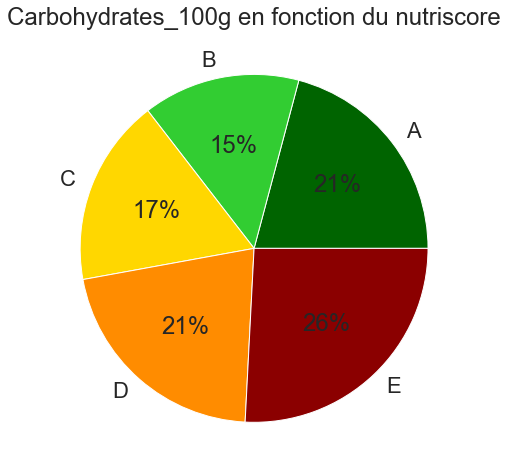

In [35]:
# declaring data
data = df_gb['carbohydrates_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Carbohydrates_100g en fonction du nutriscore')  
# displaying chart
plt.show()

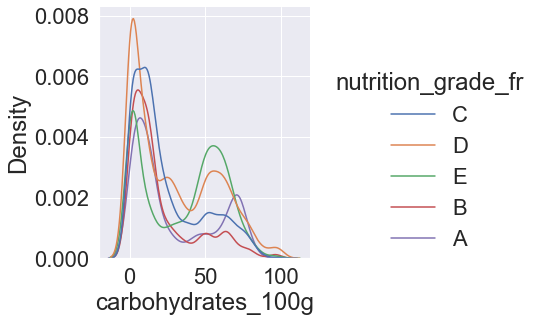

In [36]:
sns.displot(data=df, x="carbohydrates_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

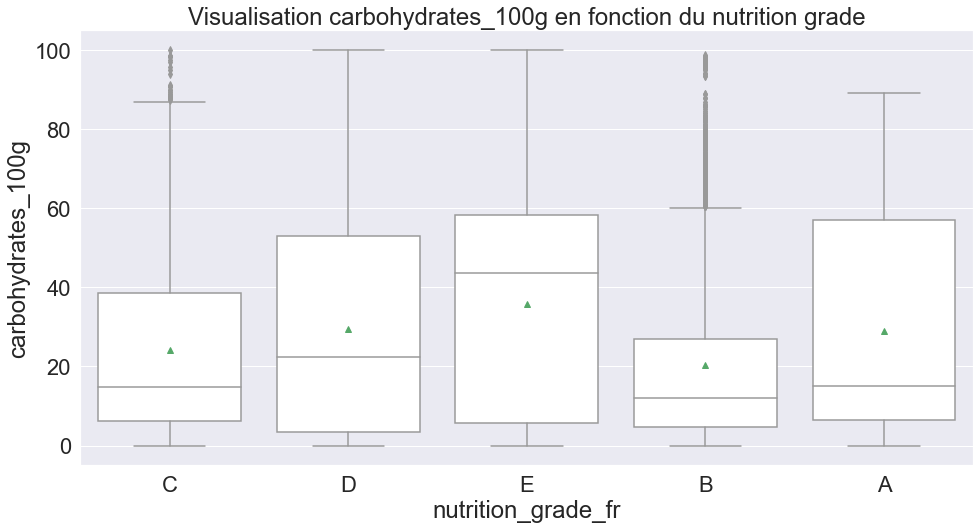

In [37]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

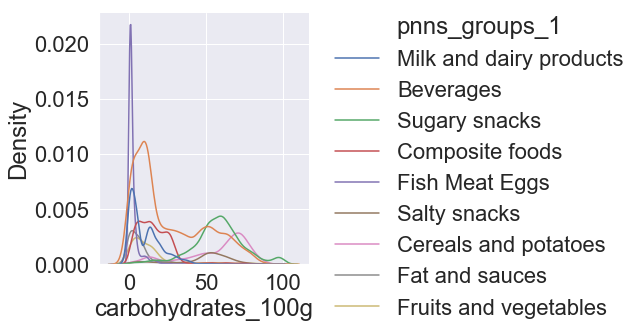

In [38]:
sns.displot(data=df, x="carbohydrates_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

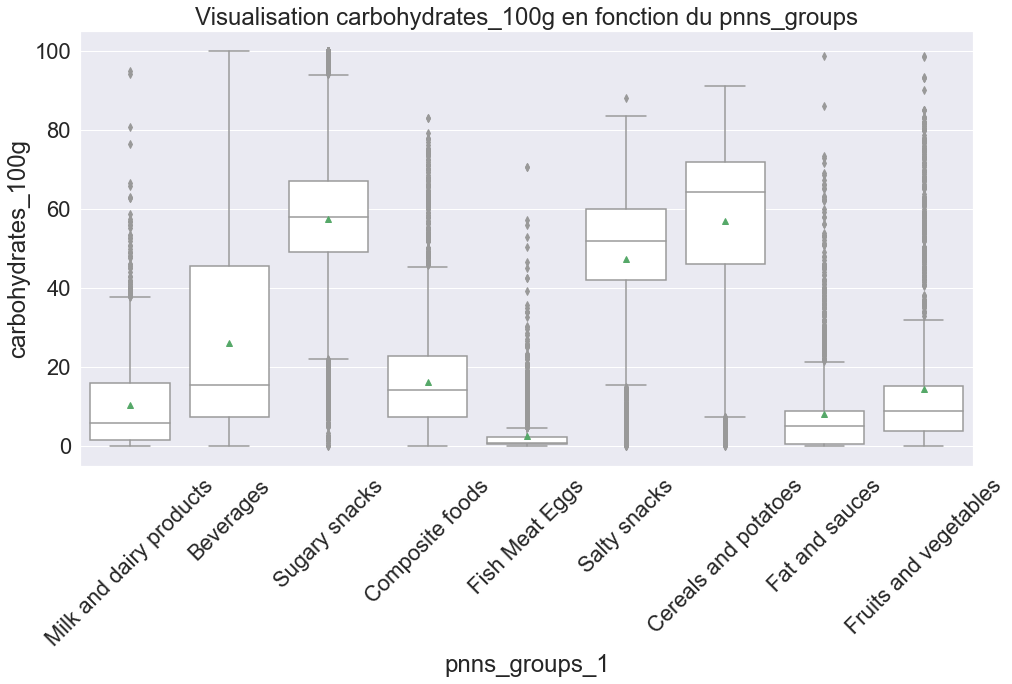

In [39]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Saturated-fat_100g
### Nutriscore

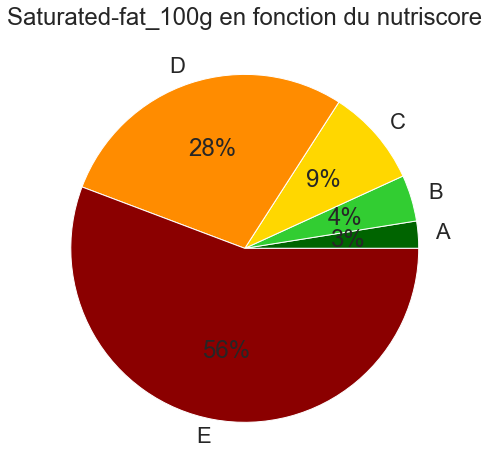

In [40]:
# declaring data
data = df_gb['saturated-fat_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Saturated-fat_100g en fonction du nutriscore')  
# displaying chart
plt.show()

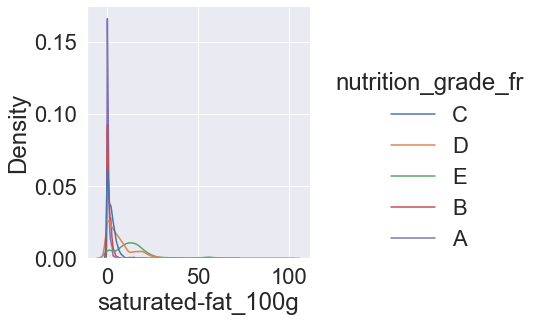

In [41]:
sns.displot(data=df, x="saturated-fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

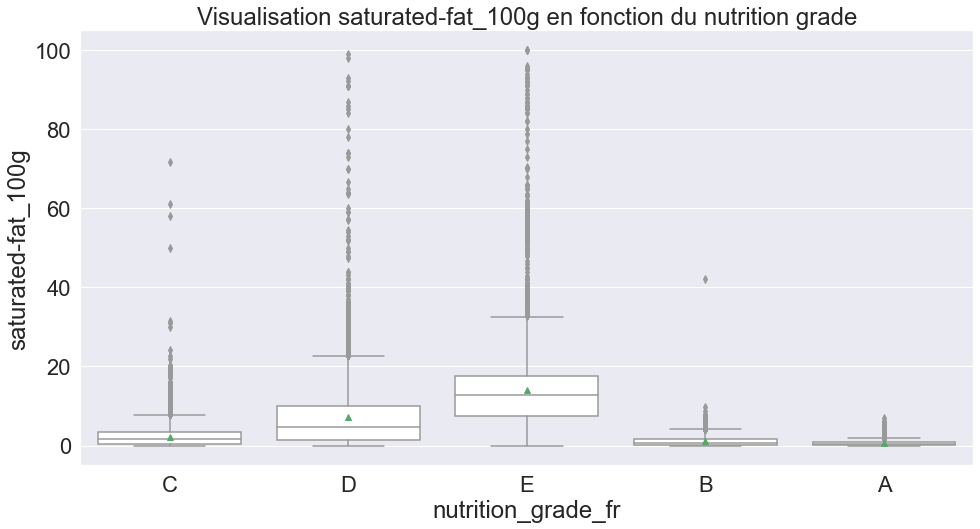

In [42]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation saturated-fat_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

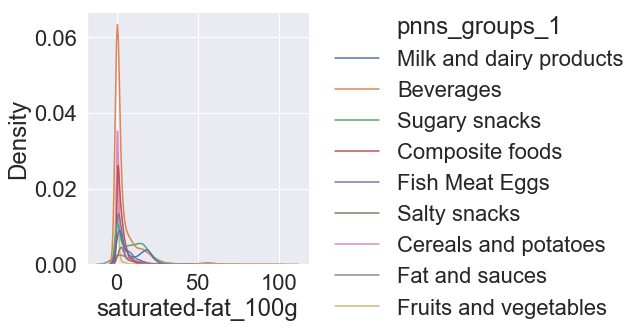

In [43]:
sns.displot(data=df, x="saturated-fat_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

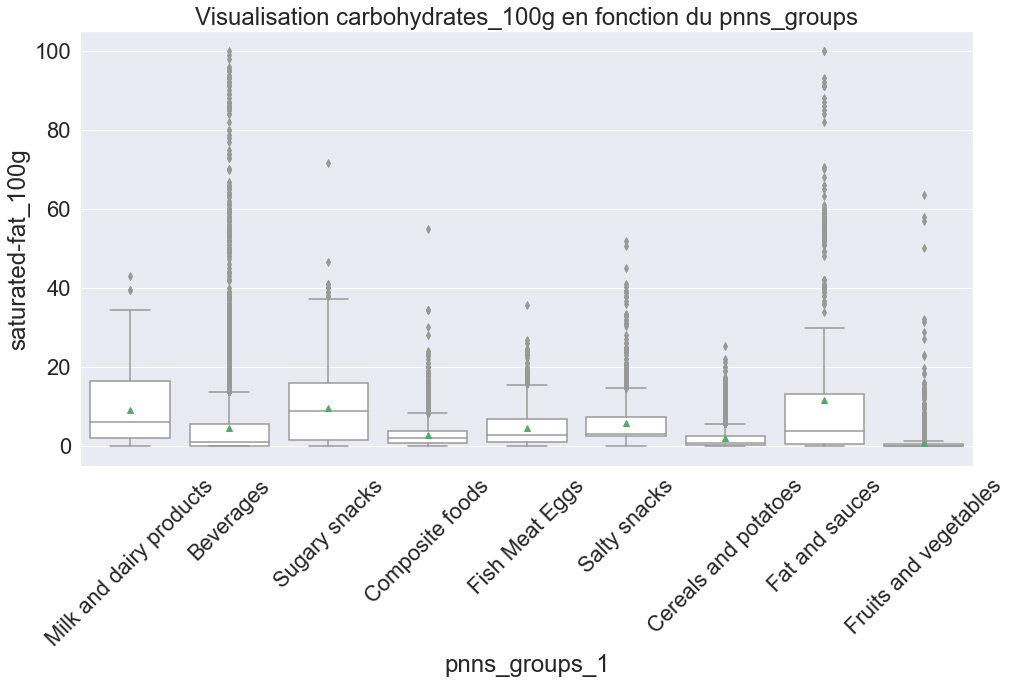

In [44]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Fiber_100g 
### Nutriscore

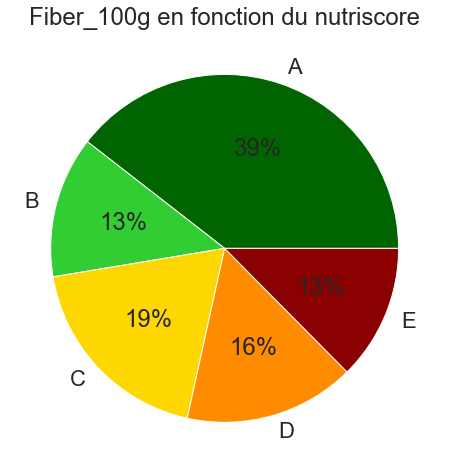

In [45]:
# declaring data
data = df_gb['fiber_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Fiber_100g en fonction du nutriscore')  
# displaying chart
plt.show()

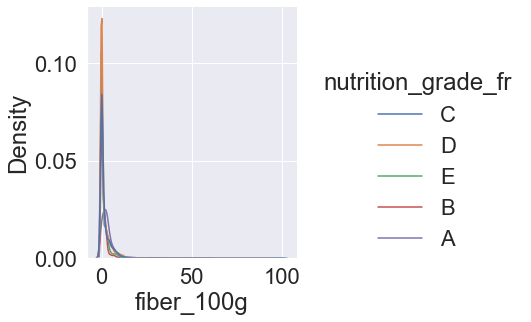

In [46]:
sns.displot(data=df, x="fiber_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

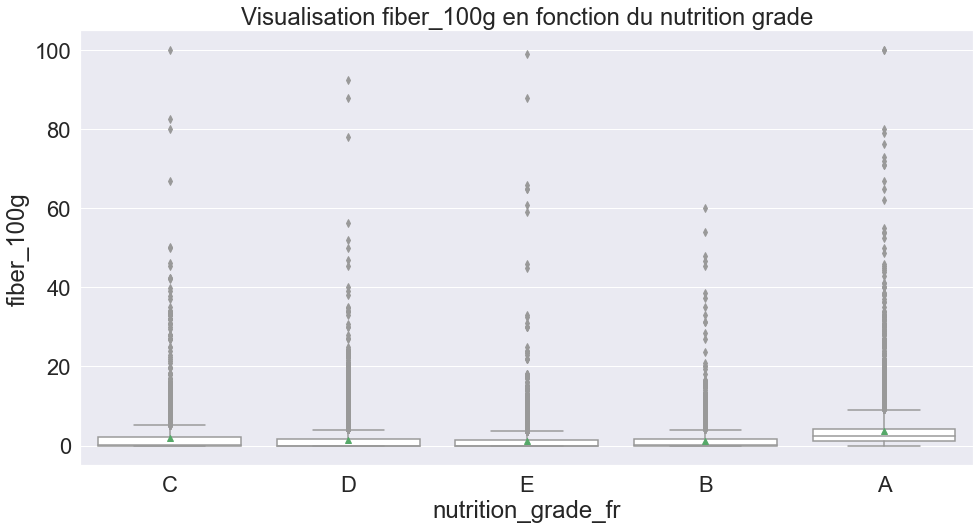

In [47]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fiber_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

<Figure size 1152x576 with 0 Axes>

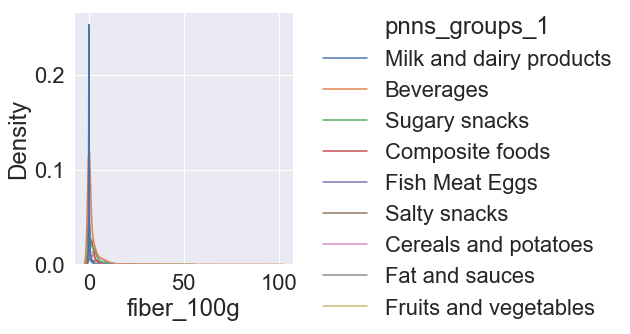

In [48]:
fig = plt.figure(figsize=[16, 8])
sns.displot(data=df, x="fiber_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

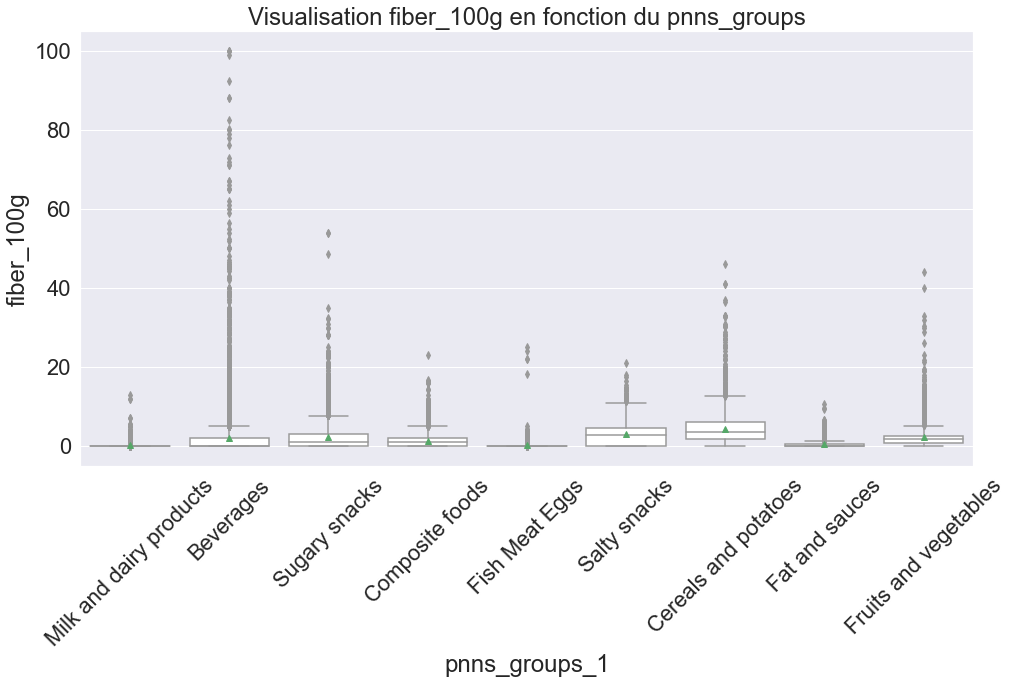

In [49]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fiber_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## Proteins_100g  
### Nutriscore

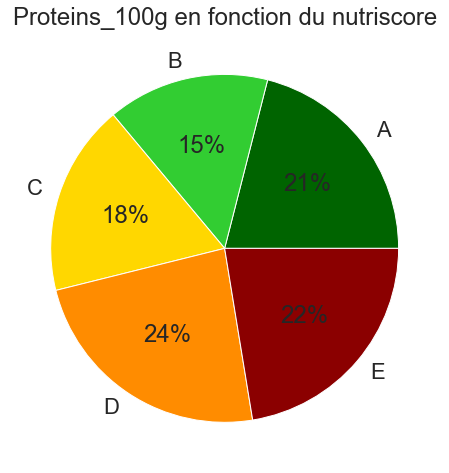

In [50]:
# declaring data
data = df_gb['proteins_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Proteins_100g en fonction du nutriscore')  
# displaying chart
plt.show()

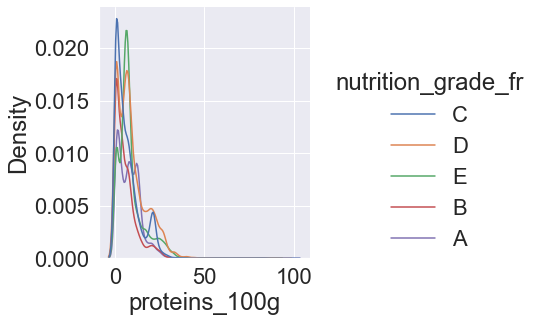

In [51]:
sns.displot(data=df, x="proteins_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

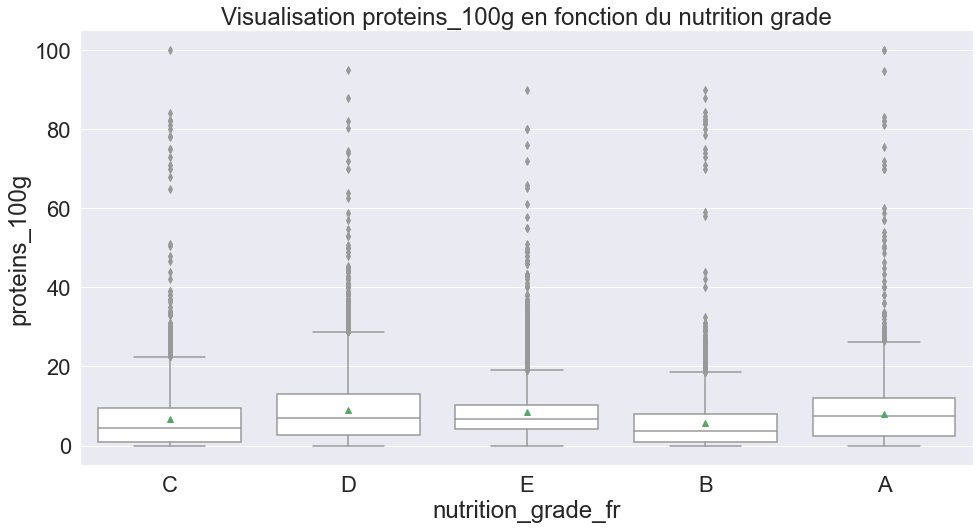

In [52]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation proteins_100g en fonction du nutrition grade")
plt.show()

### Pnns Group

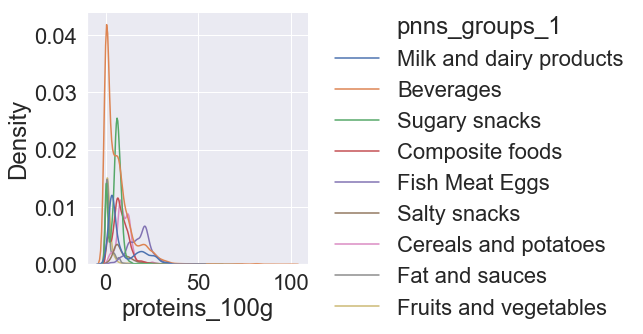

In [53]:
sns.displot(data=df, x="proteins_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

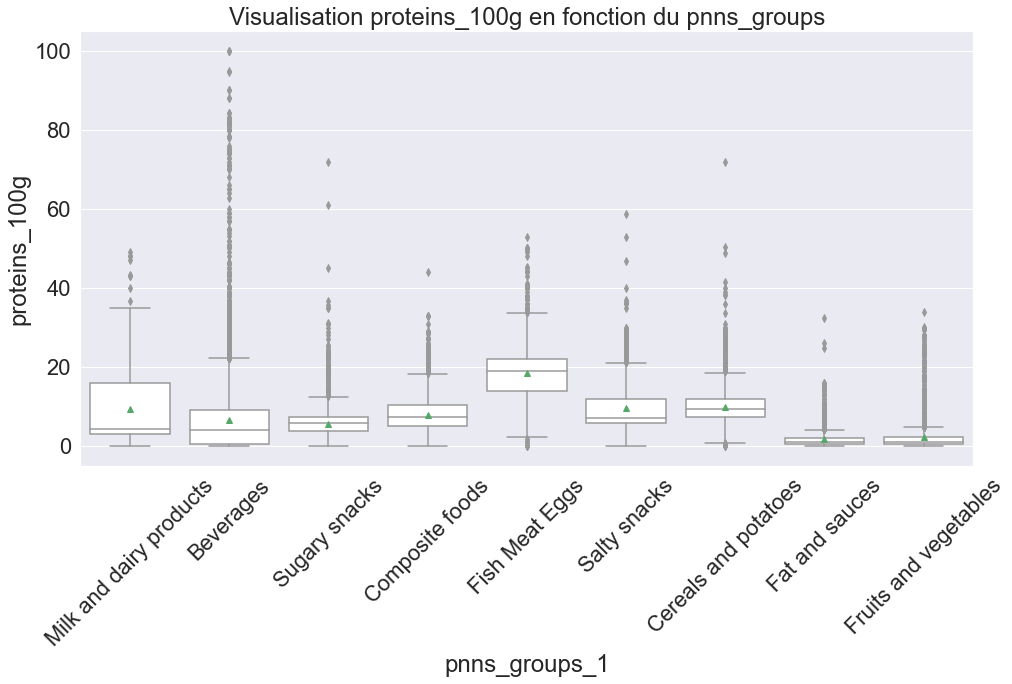

In [54]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation proteins_100g en fonction du pnns_groups")
plt.xticks(rotation=45)
plt.show()

## salt_100g 
### Nutriscore

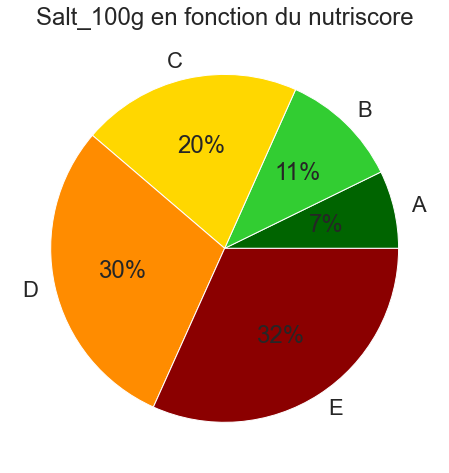

In [55]:
# declaring data
data = df_gb['salt_100g']
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
  
# plotting data on char.fit
fig = plt.figure(figsize=[16, 8])
plt.pie(data, labels=nutrition_grade, colors=colors, autopct='%.0f%%')
plt.title('Salt_100g en fonction du nutriscore')  
# displaying chart
plt.show()

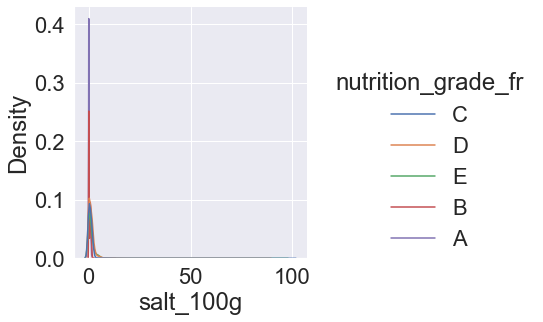

In [56]:
sns.displot(data=df, x="salt_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

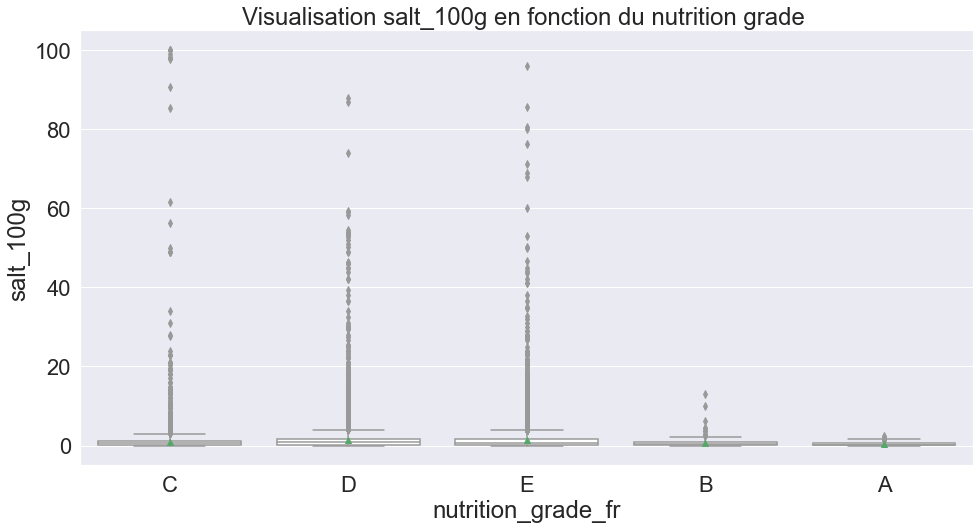

In [57]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation salt_100g en fonction du nutrition grade ")
plt.show()

### Pnns Group

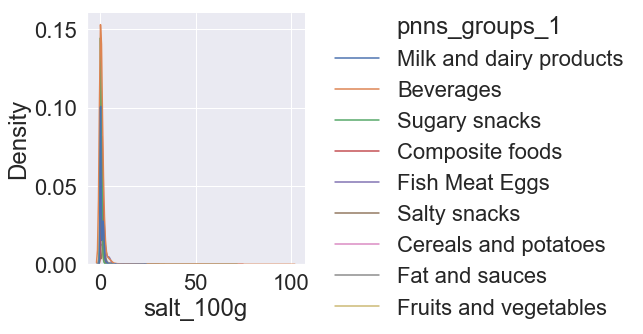

In [58]:
sns.displot(data=df, x="salt_100g", hue="pnns_groups_1", kind="kde", log_scale=None)

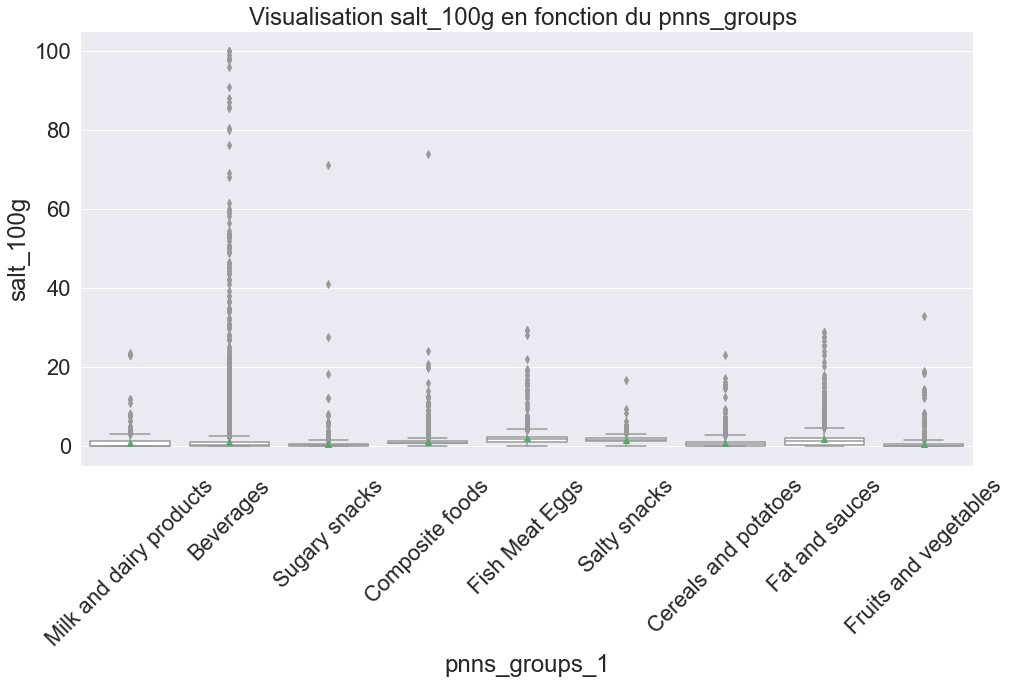

In [59]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="pnns_groups_1", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation salt_100g en fonction du pnns_groups ")
plt.xticks(rotation=45)
plt.show()

In [60]:
df

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
0           3.0     8.500000    66.666667            8.500000   
1           0.0     9.700000    43.666667           10.000000   
2           0.8    56.000000    33.666667           76.000000   
3          14.3    34.300000    21.000000           59.100000   
4          22.0    24.933333    14.000000           52.000000   
...         ...          ...          ...                 ...   
42062       7.6     0.800000    58.666667           13.300000   
42063       5.0    13.833333    34.666667            1.500000   
42064       0.4     0.200000    47.666667           80.400000   
42065       0.5     2.000000    32.000000           10.833333   
42066       0.0     8.400000    80.000000           10.800000   

       saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
0                2.000000         0.0           13.0   2.000000   
1                0.000000         0.0            0.5   0.030000   
2                0.100000         4.8            0.8   0.050038   
3                6.200000         2.6            5.5   0.530000   
4               38.933333         0.0            6.0   0.400000   
...                   ...         ...            ...        ...   
42062            2.300000         0.0            6.7   0.880000   
42063           11.733333         0.0           11.0   1.250000   
42064            0.100000         1.0            6.7   0.013005   
42065            0.000000        54.0            3.0   0.177800   
42066            0.000000         0.0            0.0   0.040000   

                 pnns_groups_1  \
0      Milk and dairy products   
1                    Beverages   
2                Sugary snacks   
3                Sugary snacks   
4                Sugary snacks   
...                        ...   
42062          Composite foods   
42063                Beverages   
42064     Cereals and potatoes   
42065            Sugary snacks   
42066                Beverages   

                                            product_name nutrition_grade_fr  
0        Bridelight 3% Les carrés fondants goût Emmental                  C  
1                                    100 % Pur Jus Pomme                  C  
2                                      18 marrons glacés                  C  
3                        6 carrés fourrés, saveur amande                  D  
4                                    Barre marbrée cacao                  E  
...                                                  ...                ...  
42062                                   Плов со свининой                  B  
42063                                        גבינת קוטג'                  E  
42064                                                寿司米                  A  
42065                                                 쌀떡                  A  
42066                                              칠성사이다                  D  

[42067 rows x 11 columns]

In [61]:
pnns_group_1 = df["pnns_groups_1"].unique()

In [62]:
# Diagramme en tuyaux d'orgues pour le nutriscore
def show_nutriscores_bar(grades, xlabel="Nutriscore"):
    sorted_grades = grades.value_counts(normalize=True, sort=False)
    for grade in df['nutrition_grade_fr']:
        if not grade in sorted_grades.keys():
            sorted_grades[grade] = 0
    sorted_grades = sorted_grades.sort_index(ascending=True)
    plt.figure(figsize=[16, 8])
    sorted_grades.plot(kind='bar', color=colors)
    plt.xlabel(xlabel)
    plt.show()

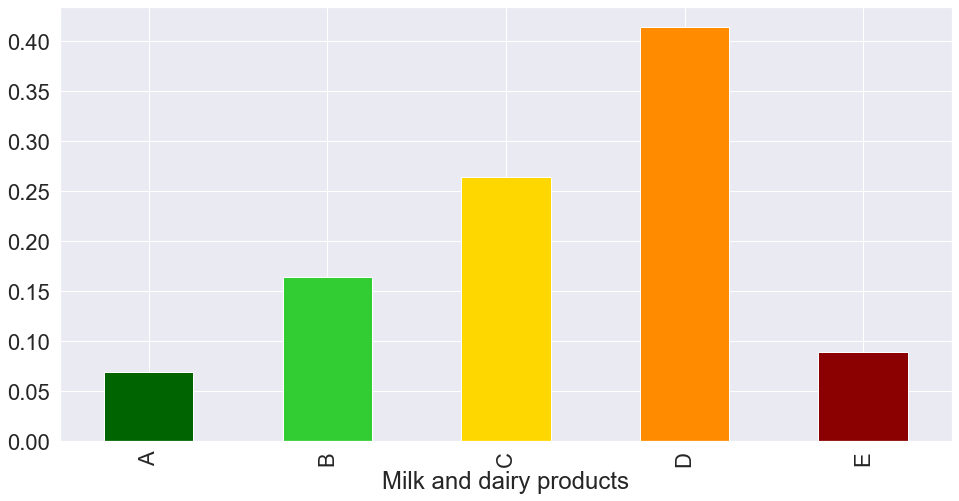

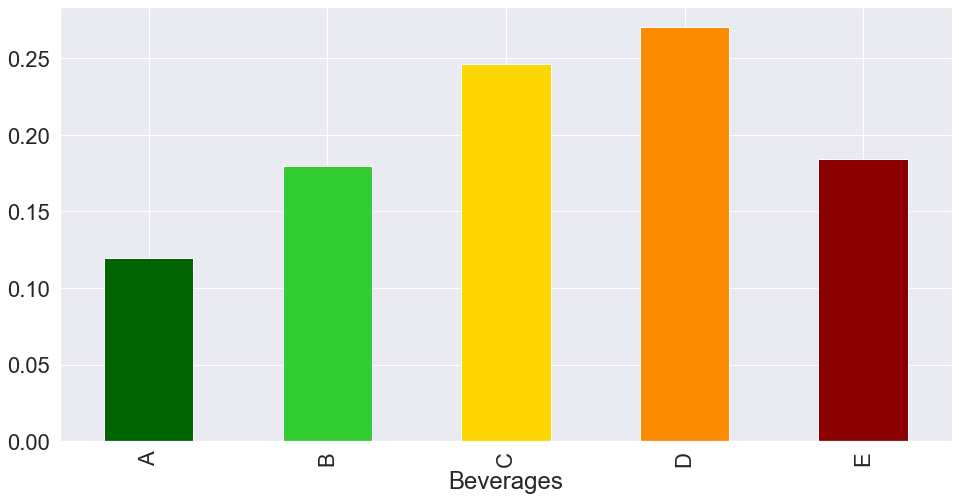

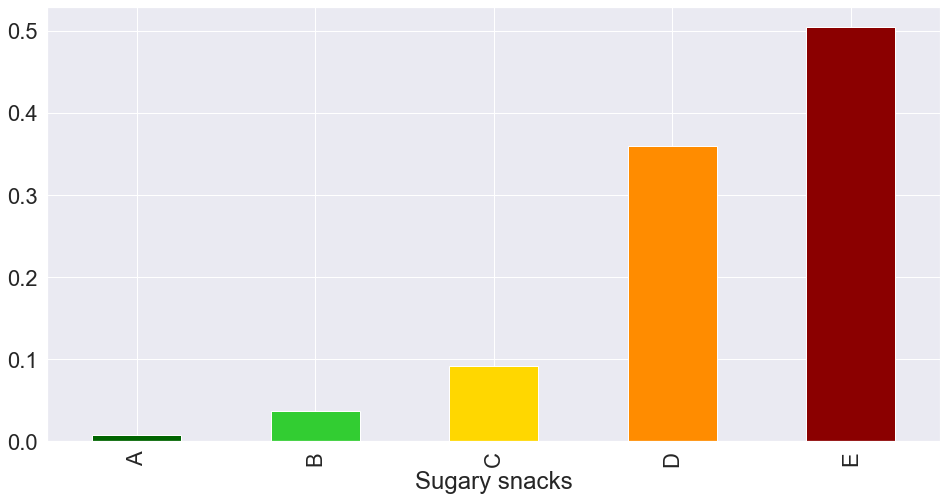

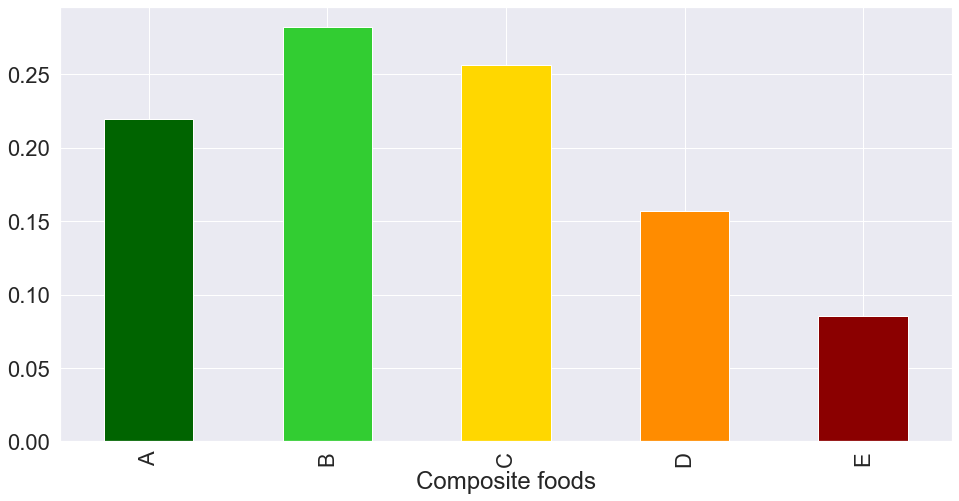

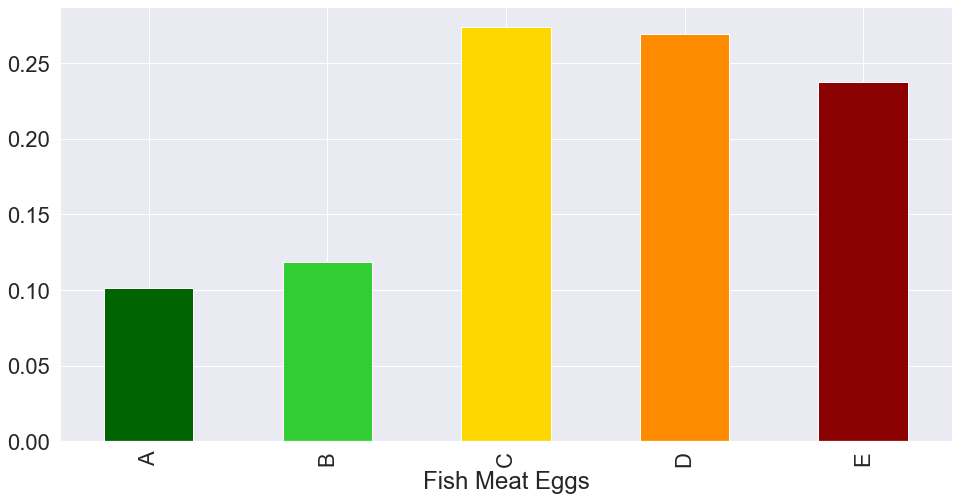

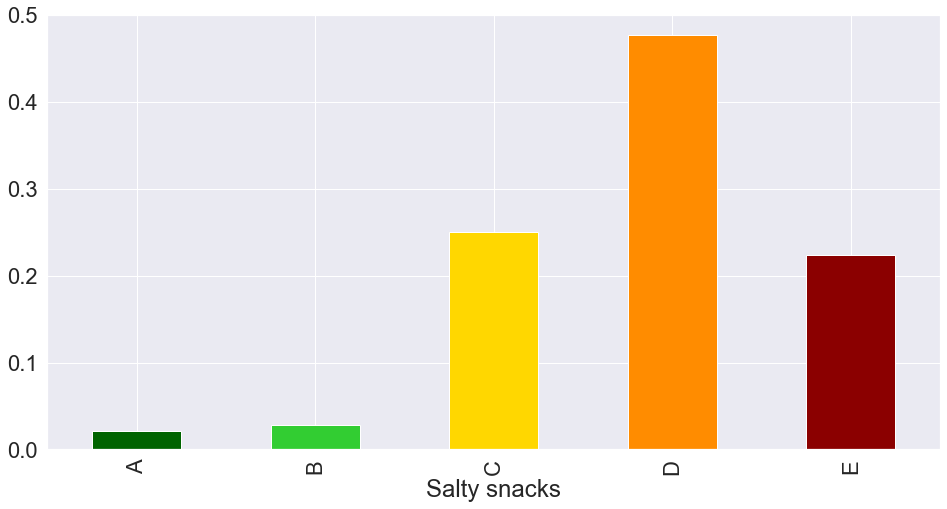

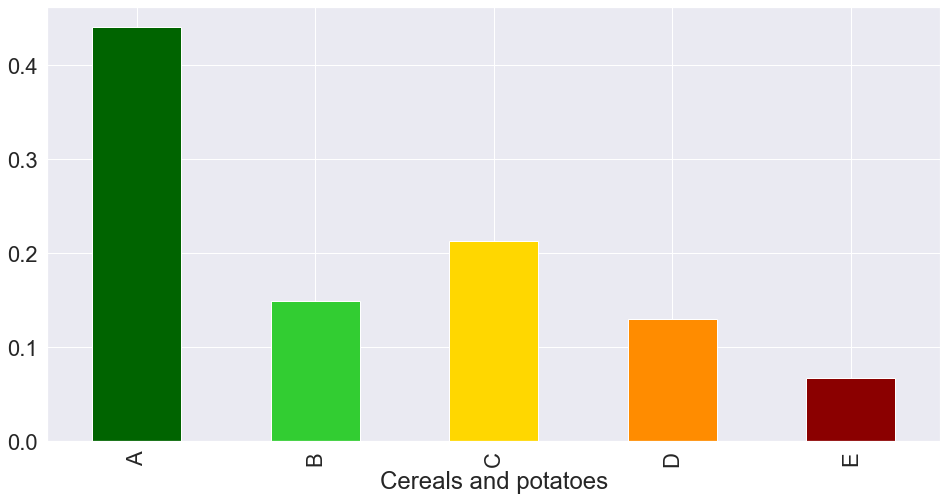

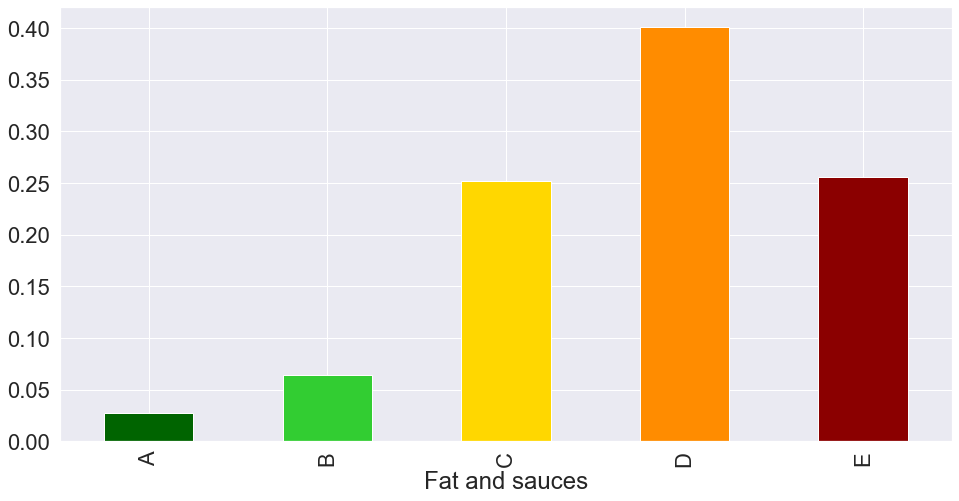

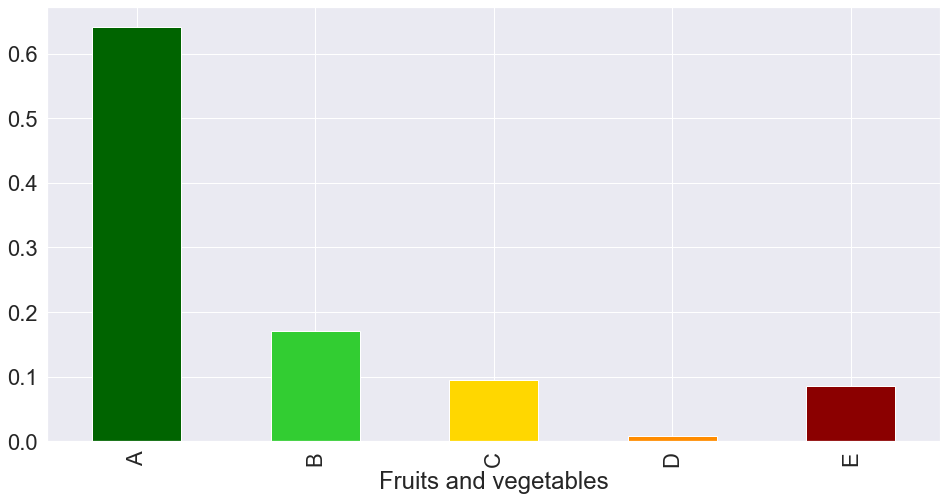

In [63]:
# puis on affiche les barplot pour chaque catégorie
for pnns_group in pnns_group_1:
    show_nutriscores_bar(df[df["pnns_groups_1"] == pnns_group]["nutrition_grade_fr"], pnns_group)

In [64]:
df = df[['product_name','fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g','nutrition_grade_fr']]

# Standardisation

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm = df_norm.select_dtypes('float')
df_norm = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns)
df_norm.head()

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  saturated-fat_100g  \
0 -0.636764    -0.275808     0.473073           -0.756821           -0.417678   
1 -0.842339    -0.211662    -0.530644           -0.699080           -0.652581   
2 -0.787519     2.263307    -0.967044            1.841561           -0.640836   
3  0.137566     1.103332    -1.519816            1.191003            0.075618   
4  0.665207     0.602637    -1.825295            0.917692            3.920196   

   fiber_100g  proteins_100g  salt_100g  
0   -0.455548       0.664634   0.327501  
1   -0.455548      -0.942930  -0.329024  
2    0.745159      -0.904348  -0.322347  
3    0.194835      -0.299904  -0.162393  
4   -0.455548      -0.235602  -0.205718

fat_100g


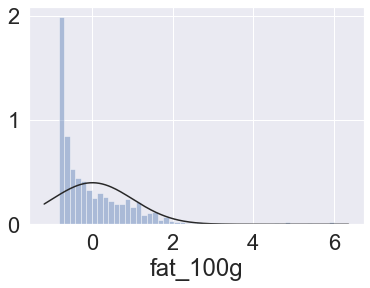

sugars_100g


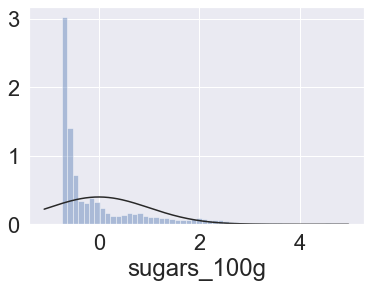

energy_100g


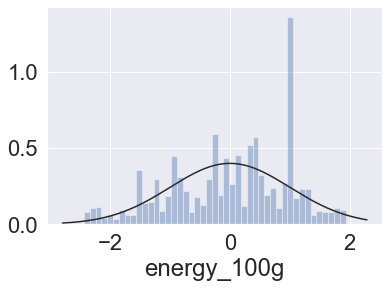

carbohydrates_100g


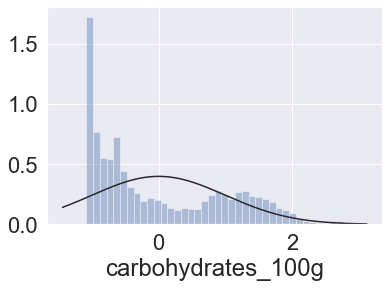

saturated-fat_100g


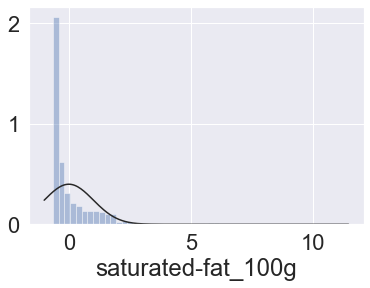

fiber_100g


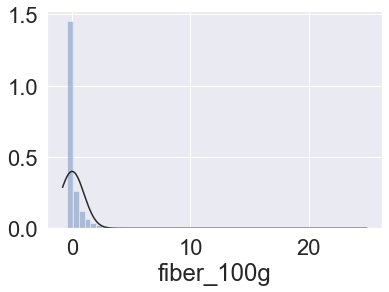

proteins_100g


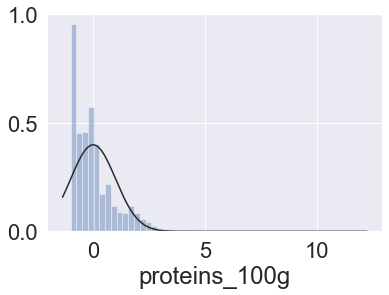

salt_100g


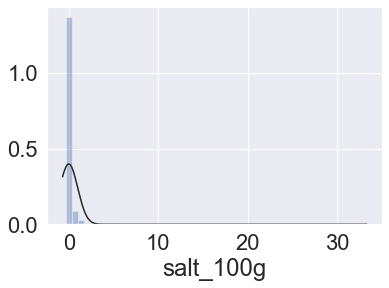

In [67]:
# verification de la distribution gausienne, test de normalité
for col in df_norm.select_dtypes('number'):
    plt.figure()
    sns.distplot(df_norm[col], fit=norm, kde=False)
    print(col)
    plt.show()

fat_100g


<Figure size 432x288 with 0 Axes>

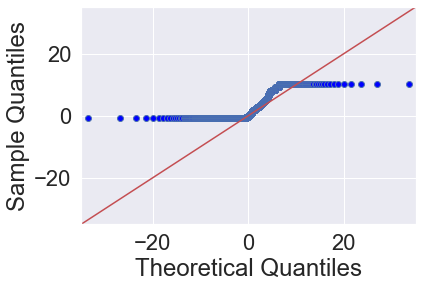

sugars_100g


<Figure size 432x288 with 0 Axes>

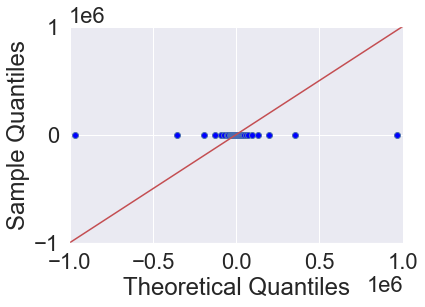

energy_100g


<Figure size 432x288 with 0 Axes>

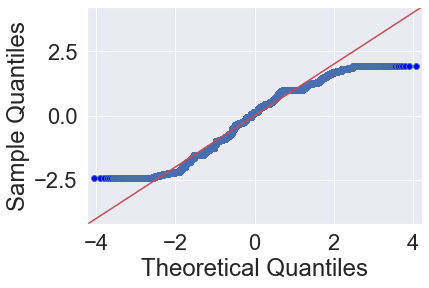

carbohydrates_100g


<Figure size 432x288 with 0 Axes>

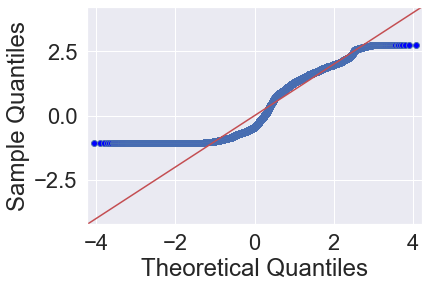

saturated-fat_100g


<Figure size 432x288 with 0 Axes>

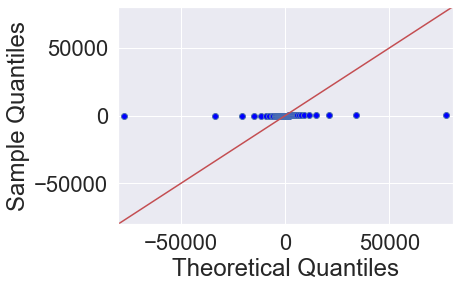

fiber_100g


<Figure size 432x288 with 0 Axes>

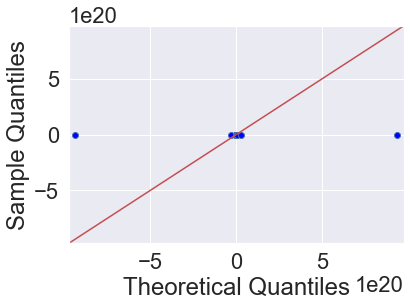

proteins_100g


<Figure size 432x288 with 0 Axes>

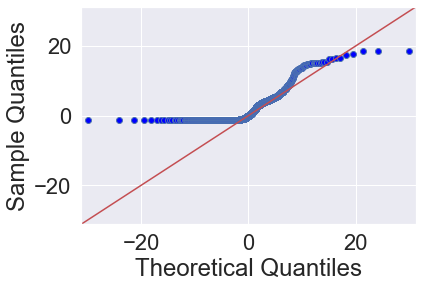

salt_100g


<Figure size 432x288 with 0 Axes>

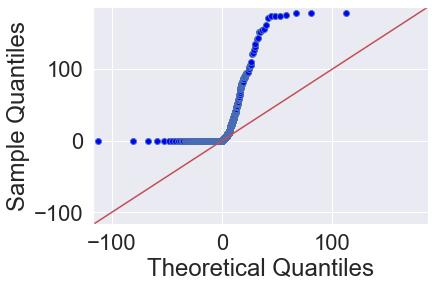

In [68]:
for col in df_norm:
    plt.figure()
    sm.qqplot(df_norm[col], st.t, fit=True, line="45")
    print(col)
    plt.show()

# Tests d'hypothèses 

Nous utiliserons la statistique inférentielle pour interpreter nos données afin d'aquérir une meilleure connaissance

Les tests parametriques :

ANOVA : Comparaison de plusieurs moyennes

Test parametrique ANOVA (puissant pour savoir si nous pouvons oui ou non rejeter H0)

In [69]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [70]:
df_nutri_grade = df['nutrition_grade_fr']

In [71]:
df_test = pd.concat([df_norm, df_nutri_grade], axis=1)

In [72]:
df_test

fat_100g  sugars_100g  energy_100g  carbohydrates_100g  \
0     -0.636764    -0.275808     0.473073           -0.756821   
1     -0.842339    -0.211662    -0.530644           -0.699080   
2     -0.787519     2.263307    -0.967044            1.841561   
3      0.137566     1.103332    -1.519816            1.191003   
4      0.665207     0.602637    -1.825295            0.917692   
...         ...          ...          ...                 ...   
42062 -0.321550    -0.687412     0.123954           -0.572048   
42063 -0.499715     0.009286    -0.923404           -1.026283   
42064 -0.814929    -0.719485    -0.356085            2.010937   
42065 -0.808076    -0.623266    -1.039777           -0.667001   
42066 -0.842339    -0.281153     1.054939           -0.668284   

       saturated-fat_100g  fiber_100g  proteins_100g  salt_100g  \
0               -0.417678   -0.455548       0.664634   0.327501   
1               -0.652581   -0.455548      -0.942930  -0.329024   
2               -0.640836    0.745159      -0.904348  -0.322347   
3                0.075618    0.194835      -0.299904  -0.162393   
4                3.920196   -0.455548      -0.235602  -0.205718   
...                   ...         ...            ...        ...   
42062           -0.382443   -0.455548      -0.145578  -0.045752   
42063            0.725516   -0.455548       0.407424   0.077555   
42064           -0.640836   -0.205401      -0.145578  -0.334688   
42065           -0.652581   13.052406      -0.621417  -0.279768   
42066           -0.652581   -0.455548      -1.007232  -0.325692   

      nutrition_grade_fr  
0                      C  
1                      C  
2                      C  
3                      D  
4                      E  
...                  ...  
42062                  B  
42063                  E  
42064                  A  
42065                  A  
42066                  D  

[42067 rows x 9 columns]

#### Les variables energy_100g d'un produit et le nutriscore

In [73]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables energy_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables energy_100g d'un produit et le nutriscore obtenu sont corrélées

In [74]:
linear_model = ols('energy_100g ~ C(nutrition_grade_fr)', data=df_test).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

                             sum_sq       df           F         PR(>F)
C(nutrition_grade_fr)    787.960673      4.0  200.726582  7.776684e-171
Residual               41279.039327  42062.0         NaN            NaN


In [75]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 7.776683845933977e-171


In [76]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

On rejette H0 : il y a une corrélation


In [77]:
#df.set_index('product_name',inplace=True)

# Analyse en Composantes Principales 

 l'ACP est une méthode statistique qui permet de représenter les données sur un graphique facilement interprétables.

In [78]:
from sklearn.decomposition import PCA
from sklearn import decomposition
from pyensae.graphhelper import Corrplot

## Diagramme éboulis des valeurs propres
Les pourcentages d’inertie nous donnent une information sur la « structure » de nos données.

Text(0.5, 1.0, 'Eboulis des valeurs propres')

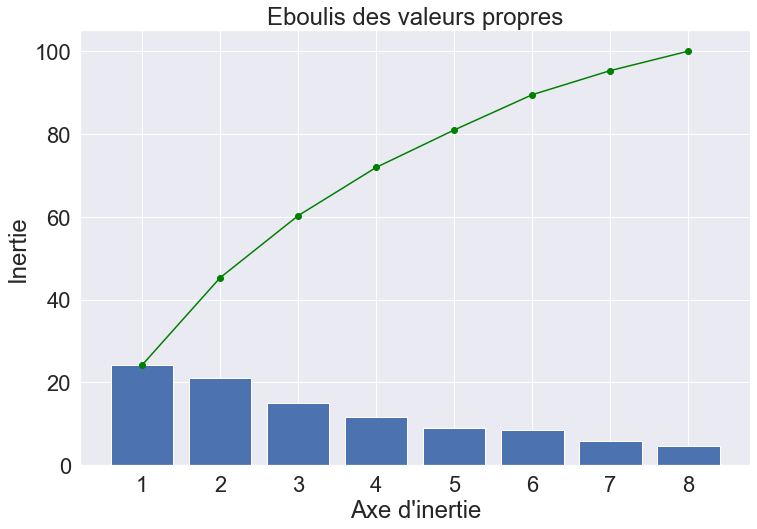

In [79]:
X = df.select_dtypes(include=['float64'])
X_scaled = scaler.fit_transform(X)

pca = PCA(svd_solver='full').fit(X_scaled)
X_projected = pca.transform(X_scaled) 

var_expl = pca.explained_variance_ratio_*100

plt.figure(figsize=(12,8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(),c="green",marker='o')
plt.xlabel("Axe d'inertie")
plt.ylabel("Inertie")
plt.title("Eboulis des valeurs propres")

In [80]:
pca = PCA(n_components=4)
Principal_components=pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2','PC 3', 'PC 4'])
print(pca_df)

           PC 1      PC 2      PC 3      PC 4
0     -0.956909 -0.829667  0.261809  0.250433
1      0.266547 -1.383128 -0.562710  0.071219
2      3.341769 -0.119884  0.138335  0.103261
3      2.055268  0.705851  0.067634  0.207213
4      1.036827  3.296782 -1.226369  0.468662
...         ...       ...       ...       ...
42062 -0.645145 -0.824255 -0.189619  0.030159
42063 -0.372227  0.095776 -0.143778  0.287502
42064  1.205835 -0.773208  0.488141 -0.197725
42065  2.557564  1.217049  8.122469 -5.828998
42066 -0.464816 -1.601037 -0.838230 -0.084121

[42067 rows x 4 columns]


In [81]:
for_visual = pd.concat([pca_df, df['nutrition_grade_fr']], axis = 1)
print(for_visual)

           PC 1      PC 2      PC 3      PC 4 nutrition_grade_fr
0     -0.956909 -0.829667  0.261809  0.250433                  C
1      0.266547 -1.383128 -0.562710  0.071219                  C
2      3.341769 -0.119884  0.138335  0.103261                  C
3      2.055268  0.705851  0.067634  0.207213                  D
4      1.036827  3.296782 -1.226369  0.468662                  E
...         ...       ...       ...       ...                ...
42062 -0.645145 -0.824255 -0.189619  0.030159                  B
42063 -0.372227  0.095776 -0.143778  0.287502                  E
42064  1.205835 -0.773208  0.488141 -0.197725                  A
42065  2.557564  1.217049  8.122469 -5.828998                  A
42066 -0.464816 -1.601037 -0.838230 -0.084121                  D

[42067 rows x 5 columns]


## Répresentation des individus

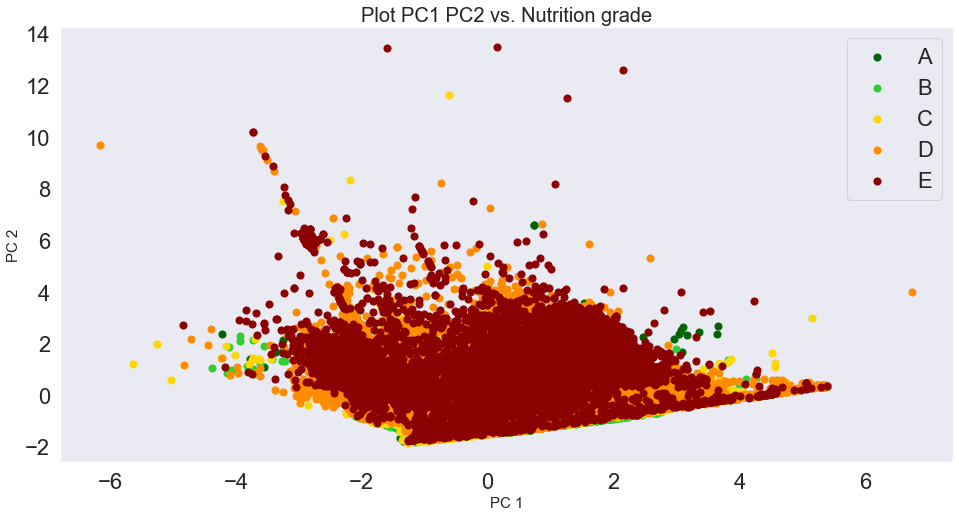

In [82]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize = 20)
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
for nutrition_grade_fr, color in zip(nutrition_grade,colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(nutrition_grade)
ax.grid()

In [83]:
# import random
import random

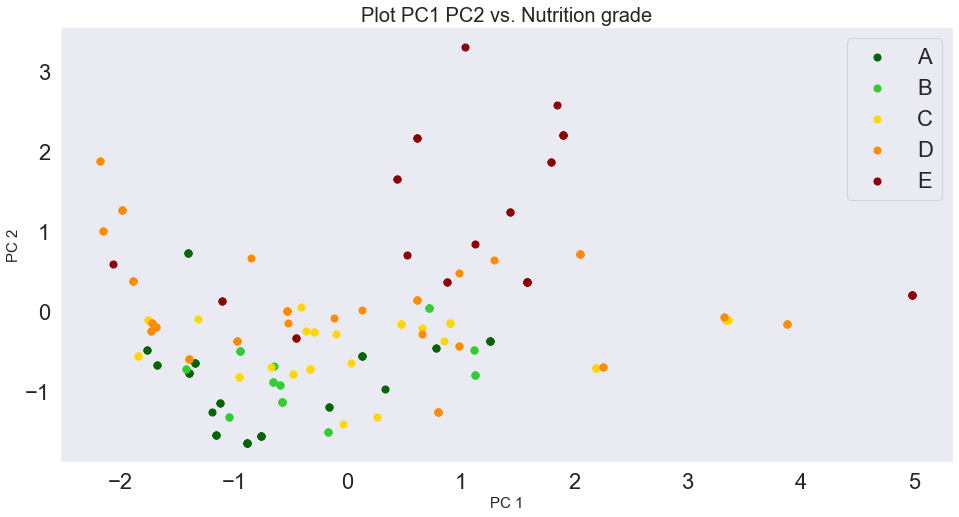

In [84]:
# Choose how many index include for random selection
random_raw = np.random.choice(100, replace=True, size=200)

for_visual_random = for_visual.iloc[random_raw]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize=20)
nutrition_grade = ['A','B','C','D','E']
colors = ['darkgreen', 'limegreen', 'gold', 'darkorange', 'darkred']
for nutrition_grade_fr, color in zip(nutrition_grade, colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual_random.loc[indicesToKeep, 'PC 1'],
               for_visual_random.loc[indicesToKeep, 'PC 2'], c=color, s=50)
ax.legend(nutrition_grade)
ax.grid()

In [85]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.24205506 0.21086158 0.14988031 0.11649531]
Cumulative Prop. Variance Explained:  [0.24205506 0.45291664 0.60279695 0.71929226]


Les 4 premières composantes expliquent 83% de la variance totale des données. On peut donc dire que la dimension intrasèques de cet ensemble de données est raisonnablement égale à 4. Transformons donc la dataframe originelle en une dataframe de 4 variables

## Cercle des corrélations

In [86]:
 def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig=plt.figure(figsize=(10,16))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='#17aafa', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [87]:
features = X.columns
features

Index(['fat_100g', 'sugars_100g', 'energy_100g', 'carbohydrates_100g',
       'saturated-fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g'],
      dtype='object')

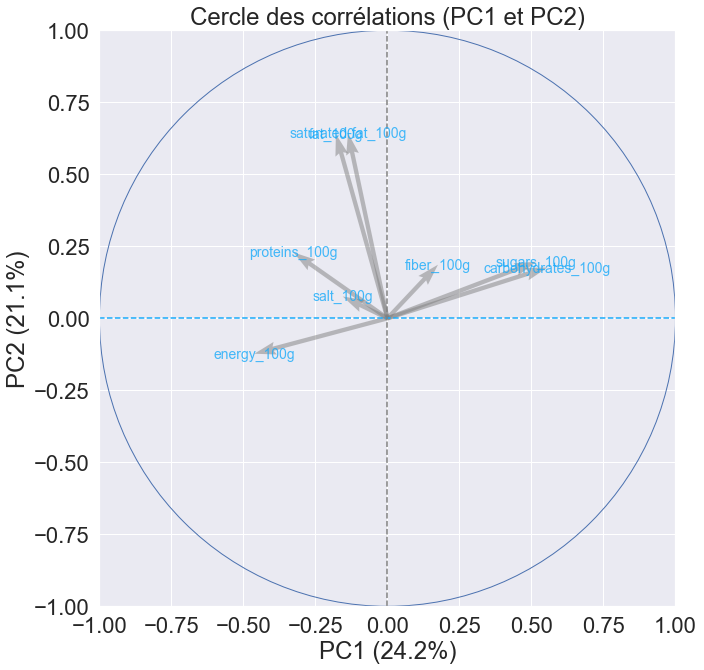

In [88]:
n_comp = 2
pcs = pca.components_
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

* F1 : le gras (fat + saturated_fat) et le sel
* F2 : le sucre (sugars + carbohydrates)

In [89]:
couleurs = {'A': 'darkgreen', 'B': 'limegreen',
            'C': 'gold', 'D': 'darkorange', 'E': 'darkred'}

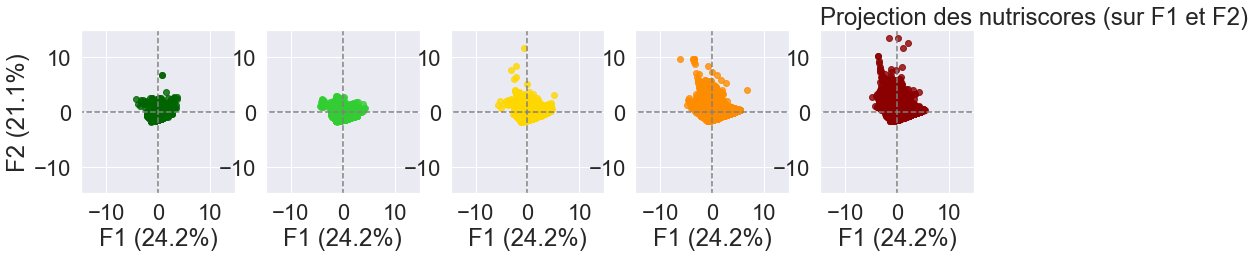

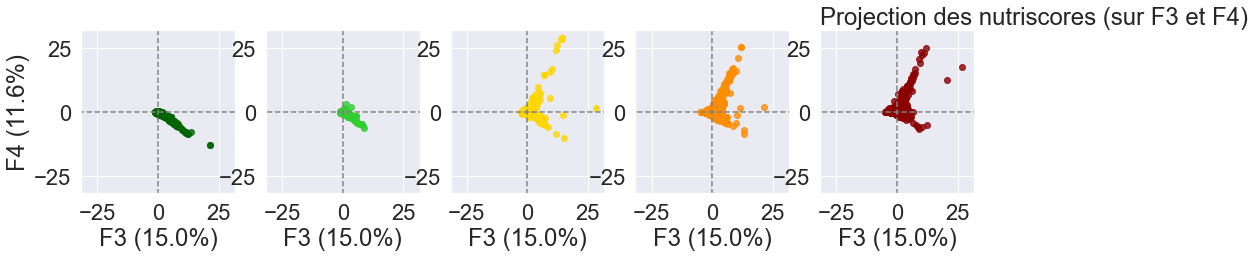

In [90]:
# Projection des individus
X_projected = pca.transform(X_scaled)
nutriscores = for_visual[for_visual['nutrition_grade_fr'].notna(
)]['nutrition_grade_fr']
for d1, d2 in [(0, 1), (2, 3)]:
    if d2 < 4:

        # initialisation de la figure
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        for value in np.unique(nutriscores):
            selected = np.where(nutriscores == value)
            plt.subplot(1, 5, pos)
            plt.scatter(X_projected[selected, d1], X_projected[selected,
                        d2], alpha=0.8, label=value, c=couleurs[value])

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            if pos == 1:
                plt.ylabel('F{} ({}%)'.format(
                    d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
            pos += 1

        plt.title("Projection des nutriscores (sur F{} et F{})".format(
            d1+1, d2+1), loc='left')
        plt.show()